In [1]:
def clearall():
    all = [var for var in globals() if var[0] != "_"]
    for var in all:
        del globals()[var]
clearall()


In [2]:
############################
######## LIBRAIRIES ########
############################
print('Importing Librairies...')
from sklearn.linear_model import LinearRegression
from colorama import Fore, Back, Style
from statsmodels.tsa.vector_ar.vecm import coint_johansen as johasen
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo
from sklearn.decomposition import PCA
import pandas as pd
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import sklearn.preprocessing
from statsmodels.tsa.stattools import adfuller
from colorama import Fore, Back, Style
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import time
import os
import datetime as dt
import numpy as np
import fxcmpy
import itertools
import shelve
import ppscore as pps
print('Librairies imported\n')
print('version fxcmpy :',fxcmpy.__version__)
%matplotlib inline
plt.style.use('seaborn')




Importing Librairies...
Librairies imported

version fxcmpy : 1.2.6


In [3]:
##############################################
######## INITIALISATION DES VARIABLES ########
##############################################



'''
TOKEN = '039add1dbe2b344ed08c518a98c7a1796f7a33c2'
server = 'demo'
user_id = 'D261219574'
compte = '01215057'
password = '3555'
'''

 #'''
# COMPTE POUBELLE #
TOKEN = 'c212b56921e0f43c191b4e4d27fae725e518786e'
server = 'demo'
user_id = 'D261219576'
compte = '01215059'
password = '8029'
 #'''

# minutes: 'm1' , 'm5' , 'm15' , 'm30' 
# hours: 'H1' , 'H2', 'H3', 'H4', 'H6' 'H8'
# one day: 'D1'
# one week: 'W1'
# one month: 'M1'
period = 'm1'
number = 10000 # Nombre de periodes pour l'historique
invers = 'non'
diloug = 2016 # 7 jours pour le training

break_it = 0
stop = 0
full_stop = 1

sens = 'INIT'

_os = 0
ol = 0
cs = 0
cl = 0
buy1 = 0
buy2 = 0
buy3 = 0
sell1 = 0
sell2 = 0
sell3 = 0
nbposs = 0
nbposl = 0
nbpos = 0
nbre_trade = 0
nbre_trade_long = 0
nbre_trade_short = 0
pnll = 0
pnls = 0
residu = 0
dyn_net_pnl = 0
amplitude = 0
cste = 0
mise = 0
mark = -1
lim_s1 = 0
lim_s2 = 0
lim_s3 = 0
lim_l1 = 0
lim_l2 = 0
lim_l3 = 0
lim_cs = 0
lim_cl = 0
dyn_S = 0
_mean = 0
_std = 0

debut = dt.date(1,1,1)
fin = dt.date(1,1,1)
split = dt.date(1,1,1)


base_pair0 = pd.DataFrame()
base_pair1 = pd.DataFrame()
base_pair2 = pd.DataFrame()
base_pair3 = pd.DataFrame()
base_pair4 = pd.DataFrame()
pair = pd.DataFrame()
pair0 = pd.DataFrame()
pair1 = pd.DataFrame()
pair2 = pd.DataFrame()
pair3 = pd.DataFrame()
pair4 = pd.DataFrame()


coef = []
S = []
PAIR = []
CSTE = []
DYNS = []
TICKERS = []
BIG_TICKERS = []
TIME_FRAME = []
INDEX = []
INSTRUMENTS = []
SL_PACK = []



D = {'TOKEN':TOKEN,'server':server,'user_id':user_id,'compte':compte,'password':password,'period':period,'number':number,'invers':invers,'diloug':diloug,'sens':sens,\
     '_os':_os,'ol':ol,'cs':cs,'cl':cl,'buy1':buy1,'buy2':buy2,'buy3':buy3,'sell1':sell1,'sell2':sell2,'sell3':sell3,'nbposs':nbposs,'nbposl':nbposl,'nbpos':nbpos,\
     'nbre_trade':nbre_trade,'nbre_trade_long':nbre_trade_long,'nbre_trade_short':nbre_trade_short,'dyn_net_pnl':dyn_net_pnl,'amplitude':amplitude,'mise':mise,\
     'CSTE':CSTE,'DYNS':DYNS,'TICKERS':TICKERS,'BIG_TICKERS':BIG_TICKERS,'pair':pair,'pair0':pair0,'pair1':pair1,'pair2':pair2,'pair3':pair3,'pair4':pair4,\
     'PAIR':PAIR,'residu':residu,'S':S,'coef':coef,'cste':cste,'debut':debut,'fin':fin,'split':split,'mark':mark,'lim_s1':lim_s1,'lim_s2':lim_s2,'lim_s3':lim_s3,\
     'lim_l1':lim_l1,'lim_l2':lim_l2,'lim_l3':lim_l3,'lim_cs':lim_cs,'lim_cl':lim_cl,'dyn_S':dyn_S,'TIME_FRAME':TIME_FRAME}


In [4]:

############################
######## FONCTIONS ########
###########################

def conX():
    con = fxcmpy.fxcmpy(access_token=TOKEN, log_level='error',server=server)
    if con.is_connected() == True:
        print(Fore.GREEN+'Connexion établie'+Style.RESET_ALL)
        print('Compte utilisé : ',con.get_account_ids())
    else:
        print(Fore.RED+'Connexion non établie'+Style.RESET_ALL)
    return(con)

def deconX():
    con.close()
    if con.is_connected() == True:
        print(Fore.GREEN+'Connexion non intérrompue'+Style.RESET_ALL)
        print('Compte utilisé : ',con.get_account_ids())
    else:
        print(Fore.RED+'Connexion intérrompue'+Style.RESET_ALL)
    return()

def remove_index(INDEX):
    for x in range(big_len):
        for ind in INDEX:
            if ind not in globals()['df%s' % x].index :
                INDEX.remove(ind)
    return(INDEX)

def clean_index(df):
    I = []
    for i in range(0,len(df)):
        if df.index[i] not in INDEX:
            I.append(i)
    df = df.drop(df.index[I])
    return(df)


def scrap_hist(ticker,invers = 'non'):
    #start = dt.datetime(2020, 4, 12)
    #stop = dt.datetime(2020, 4, 14)
    data = con.get_candles(ticker,period=period,number=number)
    #data = con.get_candles(ticker,period=period,start=start,stop=stop)
    df = pd.DataFrame(index=data.index)
    #df.index = data.index
    df['Open'] = (data['bidopen']+data['askopen'])/2
    df['High'] = (data['bidhigh']+data['askhigh'])/2
    df['Low'] = (data['bidlow']+data['asklow'])/2
    df['Close'] = (data['bidclose']+data['askclose'])/2
    if invers == 'oui':
        df['Open'] = 1 / df['Open']
        df['High'] = 1 / df['High']
        df['Low'] = 1 / df['Low']
        df['Close'] = 1 / df['Close']

    return(df)

def scrap_close(ticker,invers = 'non'):
    print('Scraping des données pour le ticker',ticker,'avec inversion à ',invers)
    data = con.get_candles(ticker,period=period,number=number)
    df = pd.DataFrame(index=data.index)
    df['Close'] = (data['bidclose']+data['askclose'])/2
    if invers == 'oui':
        df['Close'] = 1 / df['Close']

    return(df)

def isname(pair):
    global name
    if pair.equals(pair0):
        name = TICKERS[0]
    elif pair.equals(pair1):
        name = TICKERS[1]
    elif pair.equals(pair2):
        name = TICKERS[2]
    elif pair.equals(pair3):
        name = TICKERS[3]
    elif pair.equals(pair4):
        name = TICKERS[4]
    
    return(name)

def revname(name):
    if name == TICKERS[0]:
        pair = pair0
    elif name == TICKERS[1]:
        pair = pair1
    elif name == TICKERS[2]:
        pair = pair2
    elif name == TICKERS[3]:
        pair = pair3
    elif name == TICKERS[4]:
        pair = pair4
        
    return(pair)

def ols(model,results,residuals):
    jb = sm.stats.stattools.jarque_bera(residuals)[0]
    p_value = sm.stats.stattools.jarque_bera(residuals)[1]
    skew = round(sm.stats.stattools.robust_skewness(residuals)[0],4)
    kurtosis = round(sm.stats.stattools.robust_kurtosis(residuals)[0],4)
    durbinwatson = sm.stats.stattools.durbin_watson(residuals, axis=0)
    return(jb,p_value,skew,kurtosis,durbinwatson)

def ols_diff(diff):
    model_diff = sm.OLS(diff[1:],df.index[1:])
    results_diff = model_diff.fit()
    residuals_diff = results_diff.resid
    summary_diff = results_diff.summary()

    jb_diff = sm.stats.stattools.jarque_bera(residuals_diff)[0]
    p_value_diff = sm.stats.stattools.jarque_bera(residuals_diff)[1]
    skew_diff = round(sm.stats.stattools.robust_skewness(residuals_diff)[0],4)
    kurtosis_diff = round(sm.stats.stattools.robust_kurtosis(residuals_diff)[0],4)
    durbinwatson_diff = sm.stats.stattools.durbin_watson(residuals_diff, axis=0)
    return(jb_diff,p_value_diff,skew_diff,kurtosis_diff,durbinwatson_diff)

def jarque_berra(df):
    if p_value <= 0.05:
        stop = 0
    else:
        stop = 1
    return(stop)

def skewness(df):
    if skew < -0.1 or skew > 0.1:
        stop = 0
    else:
        stop = 1
    return(stop)

def kurtos(df):
    if kurtosis > -3.1 or kurtosis < 3.1:
        stop = 0
    else:
        stop = 1
    return(stop)

def autocor(df):
    autocorell = pd.DataFrame()
    autocorell['ACF'] = sm.tsa.stattools.acf(df['Close'],qstat=True,fft=False)[0]
    autocorell['PACF'] = sm.tsa.stattools.pacf(df['Close'])
    QSTAT = list(sm.tsa.stattools.acf(df['Close'],qstat=True,fft=False)[1])
    QSTAT.append(df.iloc[-1]['Close'])
    PROB = list(sm.tsa.stattools.acf(df['Close'],qstat=True,alpha=0.05,fft=False)[3])
    PROB.append(0.5)
    autocorell['QSTAT'] = QSTAT
    autocorell['PROB'] = PROB
    index = 0
    for i in range(len(autocorell)-1):
        if autocorell.iloc[i]['PACF']>autocorell.iloc[i]['PROB']+0.1:
            index += 1
    if index >= 1:
        stop = 0
    else:
        stop = 1
    return(stop)

def autocor_diff(diff):
    autocorell = pd.DataFrame()
    autocorell['ACF'] = sm.tsa.stattools.acf(diff,qstat=True,fft=False)[0]
    autocorell['PACF'] = sm.tsa.stattools.pacf(diff)
    QSTAT = list(sm.tsa.stattools.acf(diff,qstat=True)[1],fft=False)
    QSTAT.append(0)
    PROB = list(sm.tsa.stattools.acf(diff,qstat=True,alpha=0.05)[3],fft=False)
    PROB.append(0.5)
    autocorell['QSTAT'] = QSTAT
    autocorell['PROB'] = PROB
    index = 0
    for i in range(len(autocorell)-1):
        if autocorell.iloc[i]['PACF']>autocorell.iloc[i]['PROB']+0.1:
            index += 1
    if index >= 1:
        p = 1
    else:
        stop = 1
    return()

def test_stationarity(timeseries,lag):
    rolmean = timeseries.rolling(window=12).mean()
    rolstd = timeseries.rolling(window=12).std()

    dftest = adfuller(timeseries, autolag=None,maxlag=lag )#'AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    return(dfoutput)

def test_adf(df):
    X = df['Close'].values
    result_adf = adfuller(X)
    
    for key, value in result_adf[4].items():
        print('\t%s: %.3f' % (key, value))

    if result_adf[1] >= 0.05:
        stop = 1
    else:
        stop = 0
        
    X = diff[1:].values
    result_adf = adfuller(X)
    
    if result_adf[1] >= 0.05 :
        stop = 1

    elif result_adf[0] >= min([result_adf[4]['1%'],result_adf[4]['5%'],result_adf[4]['10%']]):
        stop = 1

    else:
        stop = 0
    return(stop)


def train(base_pair0,base_pair1,base_pair2,base_pair3,base_pair4,TIME_FRAME,TICKERS):
    global pair,pair0,pair1,pair2,pair3,pair4,PAIR,kmo_all,chi_square_value,p_value,ev,v,jh_results,v1,v2,skew,kurtosis,df,full_stop,residu,S,\
    coef,cste,break_it,debut,fin,split,mark,SL_PACK,PACK
    now = time.localtime(time.time())
    print('\nHeure locale du début du train : ',time.strftime("%Y-%m-%d %H:%M:%S", now),'\n')

    print(Fore.MAGENTA,'')
    print('|||| TIME_FRAME <---> debut :',TIME_FRAME[-diloug],' <---> split : ',split) 
    print(Style.RESET_ALL,'')
    debut = TIME_FRAME[-diloug-576] #suppression des 2 jours
    split = TIME_FRAME[-576] #suppression des 2 jours
    fin = TIME_FRAME[-1]#

    pair0 = base_pair0[(base_pair0.index >= debut)&(base_pair0.index <= split)]
    pair0['Local time'] = pair0.index
    pair0.reset_index(drop=True, inplace=True)
    pair1 = base_pair1[(base_pair1.index >= debut)&(base_pair1.index <= split)]
    pair1['Local time'] = pair1.index
    pair1.reset_index(drop=True, inplace=True)
    pair2 = base_pair2[(base_pair2.index >= debut)&(base_pair2.index <= split)]
    pair2['Local time'] = pair2.index
    pair2.reset_index(drop=True, inplace=True)
    pair3 = base_pair3[(base_pair3.index >= debut)&(base_pair3.index <= split)]
    pair3['Local time'] = pair3.index
    pair3.reset_index(drop=True, inplace=True)
    pair4 = base_pair4[(base_pair4.index >= debut)&(base_pair4.index <= split)]
    pair4['Local time'] = pair4.index
    pair4.reset_index(drop=True, inplace=True)


    PAIR = [pair0,pair1,pair2,pair3,pair4]

    for pair in PAIR:

        name = isname(pair)

        model = sm.OLS(pair['Close'],pair.index)
        results = model.fit()
        residuals = results.resid
        summary = results.summary()

        jb,p_value,skew,kurtosis,durbinwatson = ols(model,results, residuals)

        jarque_berra(pair)
        skewness(pair)
        kurtos(pair)
        autocor(pair)
    df = pd.DataFrame()
    for pair in PAIR:
        name = isname(pair)
        df[name] = list(pair['Close'])
    df.corr().style.background_gradient(cmap='coolwarm')

    INTEGRE = []
    for col in range(1,len(df.corr())):
        for ind in range(col):
            if df.corr().iloc[ind,col] > 0.5 and df.corr().iloc[ind,col] != 1:
                INTEGRE.append((df.corr().index[ind],df.corr().columns[col]))


    INTEGRE  = list(set(INTEGRE))

    kmo_all,kmo_model=calculate_kmo(df)

    for loop,pair in enumerate(PAIR):
        name = isname(pair)
        if kmo_all[loop] >= 0.6:
            print(Fore.GREEN,name,Style.RESET_ALL,' a un kmo considéré comme ',Fore.GREEN,'adéquat',Style.RESET_ALL)
        else:
            print(Fore.RED,name,Style.RESET_ALL,' a un kmo donsidéré comme ',Fore.RED,'inadéquat',Style.RESET_ALL)
            break_it = 1

    chi_square_value,p_value=calculate_bartlett_sphericity(df)
    if p_value < 0.05:
        stop = 0
    else:
        stop = 1
        if nbposs == 0 and nbposl == 0 : 
            #continue
            print(Back.WHITE,Fore.CYAN,'\n\n\nLIGNE 434\n\n\n',Style.RESET_ALL)

    fa = FactorAnalyzer(rotation=None)
    fa.fit(df)

    ev, v = fa.get_eigenvalues()

    PRINCIPAL_COMPOSANT = []
    for loop,pair in enumerate(PAIR):
        name = isname(pair)
        if ev[loop] >= 1:
            PRINCIPAL_COMPOSANT.append((name,ev[loop]))

    jh_results = johasen(df,0,1)
    v1 = jh_results.evec[:, 0]
    v2 = jh_results.evec[:, 1]
    if jh_results.eig[0] <= 0.05:
        stop = 0
    else:
        stop = 1
        if nbposs == 0 and nbposl == 0 : 
            #continue
            print(Back.WHITE,Fore.CYAN,'\n\n\nLIGNE 456\n\n\n',Style.RESET_ALL)
    
    X = df.iloc[:,1:]
    y = df.iloc[:,0]
    reg = LinearRegression().fit(X, y)
    score = reg.score(X, y) *100
    coef = reg.coef_
    cste = reg.intercept_
    CSTE.append(cste)

    if score > 70:
        stop = 0
        #loop = -1
        for loop,pair in enumerate (PAIR):
            name = isname(pair)
            if loop == 0:
                #continue
                print('Paire principale :',name)
            #loop += 1
            else:
                try:
                    print(name,' - coef : ',coef[loop-1]) 
                except:
                    print('Problème calculationique')
                    stop = 1
                    if nbposs == 0 and nbposl == 0 : 
                        continue
                        print(Back.WHITE,Fore.CYAN,'\n\n\nLIGNE 481\n\n\n',Style.RESET_ALL)
                           

    elif score > 50:
        
        loop = 0
        for pair in PAIR:
            name = isname(pair)
            if name == TICKERS[0]:
                continue
            loop += 1
            try:
                print(name,' : ',coef[loop])
            except:
                stop = 1
                if nbposs == 0 and nbposl == 0 : 
                    continue
                    print(Back.WHITE,Fore.CYAN,'\n\n\nLIGNE 497\n\n\n',Style.RESET_ALL)

    else:
        stop = 1
        loop = 0
        for pair in PAIR:
            name = isname(pair)
            if name == TICKERS[0]:
                continue
            loop += 1
            try:
                print(name,' : ',coef[loop])
            except:
                stop = 1
                if nbposs == 0 and nbposl == 0 : 
                    print(Back.WHITE,Fore.CYAN,'\n\n\nLIGNE 512\n\n\n',Style.RESET_ALL)
                    continue

    combo = coef[0] * df[TICKERS[1]] + coef[1] * df[TICKERS[2]] + coef[2] * df[TICKERS[3]] + coef[3] * df[TICKERS[4]] + cste

    ########
    ### RESIDUS
    ########
    residu = df[TICKERS[0]] - combo
    S = (residu - residu.mean())/residu.std()
    _mean = residu.mean()
    _std = residu.std()
    print(' Pour les TICKERS :',TICKERS,', - Moyenne du spread :',_mean,' - Std Dev du spread : ',_std)

    ####
    ## ANALYSE DES RESIDUS
    ###

    jarque_berra(residu)
    skewness(residu)
    kurtos(residu)
    residu_autocor = pd.DataFrame()
    residu_autocor['Close'] = residu.iloc[:]
    autocor(residu_autocor)

    model = sm.OLS(residu,residu.index)
    results = model.fit()
    residuals = results.resid
    summary = results.summary()
    name = 'Analyse des Résidus'
    jb,p_value,skew,kurtosis,durbinwatson = ols(model,results, residuals)

    dfoutput =  test_stationarity(residu,lag = 1)
    if dfoutput[1] < 0.05 and dfoutput[0] < dfoutput[6]:
        print('Le test est ',Fore.GREEN,'VALIDE',Style.RESET_ALL,'et le résidu est : ',Fore.GREEN,'STATIONNAIRE',Style.RESET_ALL)
        
        stop = 0
    else:
        print('Le test est ',Fore.RED,'NON VALIDE',Style.RESET_ALL,'et le résidu  : ',Fore.RED,'NON STATIONNAIRE',Style.RESET_ALL)
        stop = 1
        if nbposs == 0 and nbposl == 0 : 
            #continue
            print(Back.WHITE,Fore.CYAN,'\n\n\nLIGNE 550\n\n\n',Style.RESET_ALL)

    #######
    ### RETOUR A LA MOYENNE
    #######
    dfoutput =  test_stationarity(residu,lag = 0)

    if dfoutput[1] < 0.05 and dfoutput[0] < dfoutput[6]:
        print('Le test est ',Fore.GREEN,'VALIDE',Style.RESET_ALL,'et il y a : ',Fore.GREEN,'RETOUR A LA MOYENNE',Style.RESET_ALL)
        _retmoy1 = dfoutput[1]
        _retmoy6 = dfoutput[6]
        # stop = 0 # => On veut que tout soit validé avant. Donc pas de stop à 0 ici
    else:
        print('Le test est ',Fore.RED,'NON VALIDE',Style.RESET_ALL,"et il n'y a ",Fore.RED,'PAS RETOUR A LA MOYENNE',Style.RESET_ALL)
        stop = 1
        if nbposs == 0 and nbposl == 0 : 
            #continue
            print(Back.WHITE,Fore.CYAN,'\n\n\nLIGNE 565\n\n\n',Style.RESET_ALL)


    chi_square_value,p_value=calculate_bartlett_sphericity(df)
    if p_value < 0.05:
        print(Fore.GREEN,'Statistically significant',Style.RESET_ALL," ce qui signifie que la matrice de correlation observée n'est pas une identity matrix" )
        #pass
    else:
        print(Fore.RED,'Statistically non significant',Style.RESET_ALL," ce qui signifie que la matrice de correlation observée peut être une identity matrix" )
        #pass

    fa = FactorAnalyzer(rotation=None)
    fa.fit(df)

    ev, v = fa.get_eigenvalues()



    pca = PCA(n_components=2)
    pca.fit(df)

    x_pca = pca.transform(df)
    x_pca.shape


    for loop,pair in enumerate(PAIR):
        name = isname(pair)

    jh_results = johasen(df,0,1)

    v1 = jh_results.evec[:, 0]
    v2 = jh_results.evec[:, 1]

    if jh_results.eig[0] <= 0.05:
        print('\nTest de cointiégration de Johasen ',Fore.GREEN,'VALIDE!',Style.RESET_ALL)
        #pass
    else:
        print('\nTest de cointiégration de Johasen',Fore.RED,'INVALIDE!',Style.RESET_ALL)
        #pass
    print('\nTEST DU FULL STOP - et stop à ',stop,' - ','\n')
    if stop == 0 and break_it != 1:
        print('\nFull Stop à 0\n')
        os.system('say "בול! מצוין! הודו להשם כי טוב!"')
        full_stop = 0
        print('Trader, trader, pour information, la constante vaut ',cste)
        print(Back.LIGHTBLUE_EX,Fore.YELLOW,' P A C K     V A L I D E     = >      S L _ P A C K ',Style.RESET_ALL)
        SL_PACK.append([TICKERS,_mean,_std,S,coef])
        print('\n\n')
        
    else:
        print('\nFull Stop à 1\n')
        os.system('say "לא טוב"')
        os.system('say "עוד פעם"')
        full_stop = 1
        break_it = 0
    
    return(pair0,pair1,pair2,pair3,pair4,PAIR,split,S,SL_PACK)

def dyns_close(coef): 
    global lim_s1,lim_s2,lim_s3,lim_l1,lim_l2,lim_l3,lim_cs,lim_cl,amplitude,dyn_S,DYNS

    print(Back.LIGHTBLUE_EX,Fore.YELLOW,' C A L C U L    D E    D Y N _ S ',Style.RESET_ALL)

    print('\n\nTAILLES DES POSITIONS (coef x mise en devise):')
    try:
        if '/USD' in TICKERS[0]:
            print(TICKERS[0],' : ', mise[0])
        if 'USD/' in TICKERS[0]:
            print(TICKERS[0],' : ', mise[0] / ((con.get_last_price(TICKERS[0]).Bid+con.get_last_price(TICKERS[0]).Ask)/2))
    except:
        print(TICKERS[0],' => NON VALIDE')

    try:
        if '/USD' in TICKERS[1]:
            print(TICKERS[1],' : ', mise[0] * abs(coef[0]))
        if 'USD/' in TICKERS[1]:
            print(TICKERS[1],' : ', mise[0] * abs(coef[0]) / ((con.get_last_price(TICKERS[1]).Bid+con.get_last_price(TICKERS[1]).Ask)/2))
    except:
        print(TICKERS[1],' => NON VALIDE')
    try:
        if '/USD' in TICKERS[2]:
            print(TICKERS[2],' : ', mise[0] * abs(coef[1]))
        if 'USD/' in TICKERS[2]:
            print(TICKERS[2],' : ', mise[0] * abs(coef[1]) / ((con.get_last_price(TICKERS[2]).Bid+con.get_last_price(TICKERS[2]).Ask)/2))
    except:
        print(TICKERS[2],' => NON VALIDE')
    try:
        if '/USD' in TICKERS[3]:
            print(TICKERS[3],' : ', mise[0] * abs(coef[2]))
        if 'USD/' in TICKERS[3]:
            print(TICKERS[3],' : ', mise[0] * abs(coef[2]) / ((con.get_last_price(TICKERS[3]).Bid+con.get_last_price(TICKERS[3]).Ask)/2))
    except:
        print(TICKERS[3],' => NON VALIDE')
    try:
        if '/USD' in TICKERS[4]:
            print(TICKERS[4],' : ', mise[0] * abs(coef[3]))
        if 'USD/' in TICKERS[4]:
            print(TICKERS[4],' : ', mise[0] * abs(coef[3]) / ((con.get_last_price(TICKERS[4]).Bid+con.get_last_price(TICKERS[4]).Ask)/2))
    except:
        print(TICKERS[4],' => NON VALIDE')
    print('\n')

    print('Le Score max est : ',max(S),' et le Score min : ',min(S))

    mark = -1
   
    if '/USD' in TICKERS[0]:
        dyn_pair0  = scrap_hist(ticker=TICKERS[0],invers = 'non')
    if 'USD/' in TICKERS[0]:
        dyn_pair0  = scrap_hist(ticker=TICKERS[0],invers = 'oui')
    dyn_pair0 ['Local time'] = dyn_pair0 .index
    dyn_pair0 .reset_index(drop=True, inplace=True)
    #dyn_pair0  = dyn_pair0 .iloc[-576:,:]
    if '/USD' in TICKERS[1]:
        dyn_pair1  = scrap_hist(ticker=TICKERS[1],invers = 'non')
    if 'USD/' in TICKERS[1]:
        dyn_pair1  = scrap_hist(ticker=TICKERS[1],invers = 'oui')
    dyn_pair1['Local time'] = dyn_pair1.index
    dyn_pair1.reset_index(drop=True, inplace=True)
    #dyn_pair1 = dyn_pair1.iloc[-576:,:]
    if '/USD' in TICKERS[2]:
        dyn_pair2  = scrap_hist(ticker=TICKERS[2],invers = 'non')
    if 'USD/' in TICKERS[2]:
        dyn_pair2  = scrap_hist(ticker=TICKERS[2],invers = 'oui')
    dyn_pair2['Local time'] = dyn_pair2.index
    dyn_pair2.reset_index(drop=True, inplace=True)
    #dyn_pair2 = dyn_pair2.iloc[-576:,:]
    if '/USD' in TICKERS[3]:
        dyn_pair3  = scrap_hist(ticker=TICKERS[3],invers = 'non')
    if 'USD/' in TICKERS[3]:
        dyn_pair3  = scrap_hist(ticker=TICKERS[3],invers = 'oui')
    dyn_pair3['Local time'] = dyn_pair3.index
    dyn_pair3.reset_index(drop=True, inplace=True)
    #dyn_pair3 = dyn_pair3.iloc[-576:,:]
    if '/USD' in TICKERS[4]:
        dyn_pair4  = scrap_hist(ticker=TICKERS[4],invers = 'non')
    if 'USD/' in TICKERS[4]:
        dyn_pair4  = scrap_hist(ticker=TICKERS[4],invers = 'oui')
    dyn_pair4['Local time'] = dyn_pair4.index
    dyn_pair4.reset_index(drop=True, inplace=True)
    #dyn_pair4 = dyn_pair4.iloc[-576:,:]


    df = pd.DataFrame(index=dyn_pair1['Local time'])
    df[TICKERS[0]] = list(dyn_pair0 ['Close'])
    df[TICKERS[1]] = list(dyn_pair1['Close'])
    df[TICKERS[2]] = list(dyn_pair2['Close'])
    df[TICKERS[3]] = list(dyn_pair3['Close'])
    df[TICKERS[4]] = list(dyn_pair4['Close'])

    dynamic_df = df[df.index <= dyn_pair1.iloc[mark]['Local time']]
    print(Fore.MAGENTA,'')
    print('Indice : ',mark,dyn_pair1.iloc[mark]['Local time'])
    print('(Heure correspondanr à la dernière bougie récupérée)')
    print(Style.RESET_ALL,'')
    print(Back.RED,Fore.BLACK,' A C T I V A T I O N   D U   D Y N _ C O M B O   E T   D E S   L I M I T E S',Style.RESET_ALL,'\n')

    dynamic_combo = coef[0] * dynamic_df[TICKERS[1]] + coef[1] * dynamic_df[TICKERS[2]] + coef[2] * dynamic_df[TICKERS[3]] \
    + coef[3] * dynamic_df[TICKERS[4]] + cste

    dynamic_residu = dynamic_df[TICKERS[0]] - dynamic_combo
    dyn_S = (dynamic_residu - dynamic_residu.mean())/dynamic_residu.std()
    DYNS = []
    #DYNS.append(dyn_S.iloc[-576:])
    DYNS.append(dyn_S.reset_index(drop=True).iloc[-2016:])
    dyn_S = dyn_S[-1]
    
    amplitude = round(max(DYNS[-1]),4) - round(min(DYNS[-1]),4)
    print("L'amplitude détectée est de ",amplitude)

    lim_s1 = np.array(DYNS).mean()+1*np.array(DYNS).std() #np.array(DYNS).mean()+1*np.array(DYNS).std()
    lim_s2 = np.array(DYNS).mean()+1.5*np.array(DYNS).std()
    lim_s3 = np.array(DYNS).mean()+2*np.array(DYNS).std()
    print('Limite short 1',lim_s1,'Limite short 2',lim_s2,'Limite short 3',lim_s3)
    lim_l1 = np.array(DYNS).mean()-1*np.array(DYNS).std()
    lim_l2 = np.array(DYNS).mean()-1.5*np.array(DYNS).std()
    lim_l3 = np.array(DYNS).mean()-2*np.array(DYNS).std()
    print('Limite long 1',lim_l1,'Limite long 2',lim_l2,'Limite long 3',lim_l3)
    lim_cs = np.array(DYNS).mean()-0.42*np.array(DYNS).std()
    print('Limite close short',lim_cs)
    lim_cl = np.array(DYNS).mean()+0.42*np.array(DYNS).std()
    print('Limite close long',lim_cl)

    print(Back.LIGHTBLUE_EX,Fore.YELLOW,'Dyn_S : ',dyn_S,Style.RESET_ALL)
    print('Pour mémoire le spread (résidu) dynamique est de :',dynamic_residu[-1])

    plt.ion() 
    DYNS[-1].plot(figsize=(22,5),label='Score')
    plt.axhline(y=lim_s1,c='olivedrab',alpha=0.8,linestyle='--',label='Open Short signal 1')
    plt.axhline(y=lim_s2,c='olivedrab',alpha=0.4,linestyle='--',label='Open Short signal 2')
    plt.axhline(y=lim_s3,c='olivedrab',alpha=0.2,linestyle='--',label='Open Short signal 3')
    plt.axhline(y=lim_cl,c='crimson',alpha=0.4,linestyle='-',label='Close Buy signal')
    plt.axhline(y=lim_cs,c='blueviolet',alpha=0.4,linestyle='-',label='Close Short signal')
    plt.axhline(y=lim_l1,c='green',alpha=0.8,linestyle='--',label='Open Buy signal 1')
    plt.axhline(y=lim_l2,c='green',alpha=0.4,linestyle='--',label='Open Buy signal 2')
    plt.axhline(y=lim_l3,c='green',alpha=0.2,linestyle='--',label='Open Buy signal 3')
    plt.axhline(y=(lim_cl+lim_cs)/2,c='magenta',alpha=0.4,linestyle=':',label='Zéro')
    plt.legend()
    plt.title('Plot Signaux Achat / Vente sur le Score')
    plt.pause(0.05)

    return()

def dyns(coef): 
    global dyn_S,DYNS

    print(Back.LIGHTBLUE_EX,Fore.YELLOW,' C A L C U L    D E    D Y N _ S ',Style.RESET_ALL)

    print('\n\nTAILLES DES POSITIONS (coef x mise en devise):')
    try:
        if '/USD' in TICKERS[0]:
            print(TICKERS[0],' : ', mise[0])
        if 'USD/' in TICKERS[0]:
            print(TICKERS[0],' : ', mise[0] / ((con.get_last_price(TICKERS[0]).Bid+con.get_last_price(TICKERS[0]).Ask)/2))
    except:
        print(TICKERS[0],' => NON VALIDE')

    try:
        if '/USD' in TICKERS[1]:
            print(TICKERS[1],' : ', mise[0] * abs(coef[0]))
        if 'USD/' in TICKERS[1]:
            print(TICKERS[1],' : ', mise[0] * abs(coef[0]) / ((con.get_last_price(TICKERS[1]).Bid+con.get_last_price(TICKERS[1]).Ask)/2))
    except:
        print(TICKERS[1],' => NON VALIDE')
    try:
        if '/USD' in TICKERS[2]:
            print(TICKERS[2],' : ', mise[0] * abs(coef[1]))
        if 'USD/' in TICKERS[2]:
            print(TICKERS[2],' : ', mise[0] * abs(coef[1]) / ((con.get_last_price(TICKERS[2]).Bid+con.get_last_price(TICKERS[2]).Ask)/2))
    except:
        print(TICKERS[2],' => NON VALIDE')
    try:
        if '/USD' in TICKERS[3]:
            print(TICKERS[3],' : ', mise[0] * abs(coef[2]))
        if 'USD/' in TICKERS[3]:
            print(TICKERS[3],' : ', mise[0] * abs(coef[2]) / ((con.get_last_price(TICKERS[3]).Bid+con.get_last_price(TICKERS[3]).Ask)/2))
    except:
        print(TICKERS[3],' => NON VALIDE')
    try:
        if '/USD' in TICKERS[4]:
            print(TICKERS[4],' : ', mise[0] * abs(coef[3]))
        if 'USD/' in TICKERS[4]:
            print(TICKERS[4],' : ', mise[0] * abs(coef[3]) / ((con.get_last_price(TICKERS[4]).Bid+con.get_last_price(TICKERS[4]).Ask)/2))
    except:
        print(TICKERS[4],' => NON VALIDE')
    print('\n')

    print('Le Score max est : ',max(S),' et le Score min : ',min(S))

    mark = -1
    if '/USD' in TICKERS[0]:
        dyn_pair0  = scrap_hist(ticker=TICKERS[0],invers = 'non')
    if 'USD/' in TICKERS[0]:
        dyn_pair0  = scrap_hist(ticker=TICKERS[0],invers = 'oui')
    dyn_pair0 ['Local time'] = dyn_pair0 .index
    dyn_pair0 .reset_index(drop=True, inplace=True)
    #dyn_pair0  = dyn_pair0 .iloc[-576:,:]
    if '/USD' in TICKERS[1]:
        dyn_pair1  = scrap_hist(ticker=TICKERS[1],invers = 'non')
    if 'USD/' in TICKERS[1]:
        dyn_pair1  = scrap_hist(ticker=TICKERS[1],invers = 'oui')
    dyn_pair1['Local time'] = dyn_pair1.index
    dyn_pair1.reset_index(drop=True, inplace=True)
    #dyn_pair1 = dyn_pair1.iloc[-576:,:]
    if '/USD' in TICKERS[2]:
        dyn_pair2  = scrap_hist(ticker=TICKERS[2],invers = 'non')
    if 'USD/' in TICKERS[2]:
        dyn_pair2  = scrap_hist(ticker=TICKERS[2],invers = 'oui')
    dyn_pair2['Local time'] = dyn_pair2.index
    dyn_pair2.reset_index(drop=True, inplace=True)
    #dyn_pair2 = dyn_pair2.iloc[-576:,:]
    if '/USD' in TICKERS[3]:
        dyn_pair3  = scrap_hist(ticker=TICKERS[3],invers = 'non')
    if 'USD/' in TICKERS[3]:
        dyn_pair3  = scrap_hist(ticker=TICKERS[3],invers = 'oui')
    dyn_pair3['Local time'] = dyn_pair3.index
    dyn_pair3.reset_index(drop=True, inplace=True)
    #dyn_pair3 = dyn_pair3.iloc[-576:,:]
    if '/USD' in TICKERS[4]:
        dyn_pair4  = scrap_hist(ticker=TICKERS[4],invers = 'non')
    if 'USD/' in TICKERS[4]:
        dyn_pair4  = scrap_hist(ticker=TICKERS[4],invers = 'oui')
    dyn_pair4['Local time'] = dyn_pair4.index
    dyn_pair4.reset_index(drop=True, inplace=True)
    #dyn_pair4 = dyn_pair4.iloc[-576:,:]


    df = pd.DataFrame(index=dyn_pair1['Local time'])
    df[TICKERS[0]] = list(dyn_pair0 ['Close'])
    df[TICKERS[1]] = list(dyn_pair1['Close'])
    df[TICKERS[2]] = list(dyn_pair2['Close'])
    df[TICKERS[3]] = list(dyn_pair3['Close'])
    df[TICKERS[4]] = list(dyn_pair4['Close'])

    dynamic_df = df[df.index <= dyn_pair1.iloc[mark]['Local time']]
    print(Fore.MAGENTA,'')
    print('Heure correspondanr à la dernière bougie récupérée : ',dyn_pair1.iloc[mark]['Local time'])
    print('')
    print(Style.RESET_ALL,'')
    print(Back.RED,Fore.BLACK,' A C T I V A T I O N   D U   D Y N _ C O M B O   E T   D E S   L I M I T E S',Style.RESET_ALL,'\n')

    dynamic_combo = coef[0] * dynamic_df[TICKERS[1]] + coef[1] * dynamic_df[TICKERS[2]] + coef[2] * dynamic_df[TICKERS[3]] \
    + coef[3] * dynamic_df[TICKERS[4]] + cste

    dynamic_residu = dynamic_df[TICKERS[0]] - dynamic_combo
    dyn_S = (dynamic_residu - dynamic_residu.mean())/dynamic_residu.std()
    DYNS = []
    #DYNS.append(dyn_S.iloc[-576:])
    DYNS.append(dyn_S.reset_index(drop=True).iloc[-2016:])
    dyn_S = dyn_S[-1]
    
    print("L'amplitude détectée est de ",amplitude)
    print('Limite short 1',lim_s1,'Limite short 2',lim_s2,'Limite short 3',lim_s3)
    print('Limite long 1',lim_l1,'Limite long 2',lim_l2,'Limite long 3',lim_l3)
    print('Limite close short',lim_cs)
    print('Limite close long',lim_cl)
    print(Back.LIGHTBLUE_EX,Fore.YELLOW,'Dyn_S : ',dyn_S,Style.RESET_ALL)
    print('Pour mémoire,cher Trader, le spread (résidu) dynamique est de :',dynamic_residu[-1])

    plt.ion() 
    DYNS[-1].plot(figsize=(22,5),label='Score')
    plt.axhline(y=lim_s1,c='olivedrab',alpha=0.8,linestyle='--',label='Open Short signal 1')
    plt.axhline(y=lim_s2,c='olivedrab',alpha=0.4,linestyle='--',label='Open Short signal 2')
    plt.axhline(y=lim_s3,c='olivedrab',alpha=0.2,linestyle='--',label='Open Short signal 3')
    plt.axhline(y=lim_cl,c='crimson',alpha=0.4,linestyle='-',label='Close Buy signal')
    plt.axhline(y=lim_cs,c='blueviolet',alpha=0.4,linestyle='-',label='Close Short signal')
    plt.axhline(y=lim_l1,c='green',alpha=0.8,linestyle='--',label='Open Buy signal 1')
    plt.axhline(y=lim_l2,c='green',alpha=0.4,linestyle='--',label='Open Buy signal 2')
    plt.axhline(y=lim_l3,c='green',alpha=0.2,linestyle='--',label='Open Buy signal 3')
    plt.axhline(y=(lim_cl+lim_cs)/2,c='magenta',alpha=0.4,linestyle=':',label='Zéro')
    plt.legend()
    plt.title('Plot Signaux Achat / Vente sur le Score')
    plt.pause(0.05)

    return()


def shoot(coef):
    global _os,ol,cs,cl,buy1,buy2,buy3,sell1,sell2,sell3,nbposs,nbposl,nbpos,nbre_trade,nbre_trade_long,nbre_trade_short,\
           p0ol,p1ol,p2ol,p3ol,p4ol,p0os,p1os,p2os,p3os,p4os
    print('\n\n')
    print(Back.YELLOW,Fore.BLACK,'./\_-°oO-_____S H O O T_____-Oo°-_./\\',Style.RESET_ALL)
    mark = -1
    
    if dyn_S > lim_s1 and dyn_S < lim_s2 and _os == 0 and ol == 0 and sell1 == 0 and sell2 == 0 and sell3 == 0:
        #_os = scatter =  plt.scatter(x=mark,y=bt_S.iloc[mark],c='r',marker='o',label='Open Short')
        _os = 1
        ol = 0
        cl = 0
        cs = 0
        sell1 = 1
        sell2 = 0
        sell3 = 0
        buy1 = 0
        buy2 = 0
        buy3 = 0
        nbposs = 1
        nbposl = 0

        if '/USD' in TICKERS[0]:
            p0os = con.create_market_sell_order(TICKERS[0],abs(mise[0]))
            print('Taille pour',TICKERS[0],' : ',abs(mise[0]))
        if 'USD/' in TICKERS[0]:
            p0os = con.create_market_buy_order(TICKERS[0],abs(round(mise[0] / ((con.get_last_price(TICKERS[0]).Bid+con.get_last_price(TICKERS[0]).Ask)/2),4)))
            print('Taille pour',TICKERS[0],' : ',abs(round(mise[0] / ((con.get_last_price(TICKERS[0]).Bid+con.get_last_price(TICKERS[0]).Ask)/2),4)))
        
        if '/USD' in TICKERS[1]:
            if coef[0] > 0:
                p1os =  con.create_market_buy_order(TICKERS[1],abs(round(mise[0] * coef[0],4)))
                print('Taille pour',TICKERS[1],' : ',abs(round(mise[0] * coef[0],4)))
            else :
                p1os =  con.create_market_sell_order(TICKERS[1],abs(round(mise[0] * coef[0],4)))
                print('Taille pour',TICKERS[1],' : ',abs(round(mise[0] * coef[0],4)))
        if 'USD/' in TICKERS[1]:
            if coef[0] > 0:
                p1os =  con.create_market_sell_order(\
                TICKERS[1],abs(round(mise[0] * coef[0] / ((con.get_last_price(TICKERS[1]).Bid+con.get_last_price(TICKERS[1]).Ask)/2),4)))
                print('Taille pour',TICKERS[1],' : ',abs(round(mise[0] * coef[0] /((con.get_last_price(TICKERS[1]).Bid+con.get_last_price(TICKERS[1]).Ask)/2),4))) 
            else:
                p1os =  con.create_market_buy_order(\
                TICKERS[1],abs(round(mise[0] * coef[0] / ((con.get_last_price(TICKERS[1]).Bid+con.get_last_price(TICKERS[1]).Ask)/2),4)))
                print('Taille pour',TICKERS[1],' : ',abs(round(mise[0] * coef[0] /((con.get_last_price(TICKERS[1]).Bid+con.get_last_price(TICKERS[1]).Ask)/2),4)))
        
        if '/USD' in TICKERS[2]:
            if coef[1] > 0:
                p2os =  con.create_market_buy_order(TICKERS[2],abs(round(mise[0] * coef[1],4)))
                print('Taille pour',TICKERS[2],' : ',abs(round(mise[0] * coef[1],4)))
            else :
                p2os =  con.create_market_sell_order(TICKERS[2],abs(round(mise[0] * coef[1],4)))
                print('Taille pour',TICKERS[2],' : ',abs(round(mise[0] * coef[1],4)))
        if 'USD/' in TICKERS[2]:
            if coef[1] > 0:
                p2os =  con.create_market_sell_order(\
                TICKERS[2],abs(round(mise[0] * coef[1] / ((con.get_last_price(TICKERS[2]).Bid+con.get_last_price(TICKERS[2]).Ask)/2),4)))
                print('Taille pour',TICKERS[2],' : ',abs(round(mise[0] * coef[1] /((con.get_last_price(TICKERS[2]).Bid+con.get_last_price(TICKERS[2]).Ask)/2),4))) 
            else:
                p2os =  con.create_market_buy_order(\
                TICKERS[2],abs(round(mise[0] * coef[1] / ((con.get_last_price(TICKERS[2]).Bid+con.get_last_price(TICKERS[2]).Ask)/2),4)))
                print('Taille pour',TICKERS[2],' : ',abs(round(mise[0] * coef[1] /((con.get_last_price(TICKERS[2]).Bid+con.get_last_price(TICKERS[2]).Ask)/2),4)))
        
        if '/USD' in TICKERS[3]:
            if coef[2] > 0:
                p3os =  con.create_market_buy_order(TICKERS[3],abs(round(mise[0] * coef[2],4)))
                print('Taille pour',TICKERS[3],' : ',abs(round(mise[0] * coef[2],4)))
            else :
                p3os =  con.create_market_sell_order(TICKERS[3],abs(round(mise[0] * coef[2],4)))
                print('Taille pour',TICKERS[3],' : ',abs(round(mise[0] * coef[2],4)))
        if 'USD/' in TICKERS[3]:
            if coef[2] > 0:
                p3os =  con.create_market_sell_order(\
                TICKERS[3],abs(round(mise[0] * coef[2] / ((con.get_last_price(TICKERS[3]).Bid+con.get_last_price(TICKERS[3]).Ask)/2),4)))
                print('Taille pour',TICKERS[3],' : ',abs(round(mise[0] * coef[2] /((con.get_last_price(TICKERS[3]).Bid+con.get_last_price(TICKERS[3]).Ask)/2),4))) 
            else:
                p3os =  con.create_market_buy_order(\
                TICKERS[3],abs(round(mise[0] * coef[2] / ((con.get_last_price(TICKERS[3]).Bid+con.get_last_price(TICKERS[3]).Ask)/2),4)))
                print('Taille pour',TICKERS[3],' : ',abs(round(mise[0] * coef[2] /((con.get_last_price(TICKERS[3]).Bid+con.get_last_price(TICKERS[3]).Ask)/2),4)))
        
        if '/USD' in TICKERS[4]:
            if coef[3] > 0:
                p4os =  con.create_market_buy_order(TICKERS[4],abs(round(mise[0] * coef[3],4)))
                print('Taille pour',TICKERS[4],' : ',abs(round(mise[0] * coef[3],4)))
            else :
                p4os =  con.create_market_sell_order(TICKERS[4],abs(round(mise[0] * coef[3],4)))
                print('Taille pour',TICKERS[4],' : ',abs(round(mise[0] * coef[3],4)))
        if 'USD/' in TICKERS[4]:
            if coef[3] > 0:
                p4os =  con.create_market_sell_order(\
                TICKERS[4],abs(round(mise[0] * coef[3] / ((con.get_last_price(TICKERS[4]).Bid+con.get_last_price(TICKERS[4]).Ask)/2),4)))
                print('Taille pour',TICKERS[4],' : ',abs(round(mise[0] * coef[3] /((con.get_last_price(TICKERS[4]).Bid+con.get_last_price(TICKERS[4]).Ask)/2),4)))
            else:
                p4os =  con.create_market_buy_order(\
                TICKERS[4],abs(round(mise[0] * coef[3] / ((con.get_last_price(TICKERS[4]).Bid+con.get_last_price(TICKERS[4]).Ask)/2),4)))
                print('Taille pour',TICKERS[4],' : ',abs(round(mise[0] * coef[3] /((con.get_last_price(TICKERS[4]).Bid+con.get_last_price(TICKERS[4]).Ask)/2),4)))


        #print('\n\nDate : ',df.index[mark])
        now = time.localtime(time.time())
        print ('Heure locale du trade :',time.strftime("%Y-%m-%d %H:%M:%S", now))
        print(Fore.GREEN,'ACTION OPEN SHORT',Fore.MAGENTA,'Niveau 1',Style.RESET_ALL,\
                '- \nclose',TICKERS[1],' : ',df.iloc[mark][TICKERS[0]],'\nclose', TICKERS[1],' : ',df.iloc[mark][TICKERS[1]],\
                '\nClose', TICKERS[2],' : ',df.iloc[mark][TICKERS[2]],'\nClose',TICKERS[3],' : ', df.iloc[mark][TICKERS[3]],\
                '\nClose',TICKERS[4],' : ',df.iloc[mark][TICKERS[4]],'\n')  
        
        print(con.get_open_positions_summary().T)

    elif dyn_S >= lim_s2 and dyn_S < lim_s3 and ol == 0 and sell2 == 0 and sell3 == 0:
        #_os = scatter =  plt.scatter(x=mark,y=bt_S.iloc[mark],c='r',marker='o',label='Open Short')
        _os = 1
        ol = 0
        cl = 0
        cs = 0
        sell1 = 0
        sell2 = 1
        sell3 = 0
        buy1 = 0
        buy2 = 0
        buy3 = 0
        nbposs = 1
        nbposl = 0

        if '/USD' in TICKERS[0]:
            p0os = con.create_market_sell_order(TICKERS[0],abs(mise[0]))
            print('Taille pour',TICKERS[0],' : ',abs(mise[0]))
        if 'USD/' in TICKERS[0]:
            p0os = con.create_market_buy_order(TICKERS[0],abs(round(mise[0] / ((con.get_last_price(TICKERS[0]).Bid+con.get_last_price(TICKERS[0]).Ask)/2),4)))
            print('Taille pour',TICKERS[0],' : ',abs(round(mise[0] / ((con.get_last_price(TICKERS[0]).Bid+con.get_last_price(TICKERS[0]).Ask)/2),4)))
        
        if '/USD' in TICKERS[1]:
            if coef[0] > 0:
                p1os =  con.create_market_buy_order(TICKERS[1],abs(round(mise[0] * coef[0],4)))
                print('Taille pour',TICKERS[1],' : ',abs(round(mise[0] * coef[0],4)))
            else :
                p1os =  con.create_market_sell_order(TICKERS[1],abs(round(mise[0] * coef[0],4)))
                print('Taille pour',TICKERS[1],' : ',abs(round(mise[0] * coef[0],4)))
        if 'USD/' in TICKERS[1]:
            if coef[0] > 0:
                p1os =  con.create_market_sell_order(\
                TICKERS[1],abs(round(mise[0] * coef[0] / ((con.get_last_price(TICKERS[1]).Bid+con.get_last_price(TICKERS[1]).Ask)/2),4)))
                print('Taille pour',TICKERS[1],' : ',abs(round(mise[0] * coef[0] /((con.get_last_price(TICKERS[1]).Bid+con.get_last_price(TICKERS[1]).Ask)/2),4))) 
            else:
                p1os =  con.create_market_buy_order(\
                TICKERS[1],abs(round(mise[0] * coef[0] / ((con.get_last_price(TICKERS[1]).Bid+con.get_last_price(TICKERS[1]).Ask)/2),4)))
                print('Taille pour',TICKERS[1],' : ',abs(round(mise[0] * coef[0] /((con.get_last_price(TICKERS[1]).Bid+con.get_last_price(TICKERS[1]).Ask)/2),4)))
        
        if '/USD' in TICKERS[2]:
            if coef[1] > 0:
                p2os =  con.create_market_buy_order(TICKERS[2],abs(round(mise[0] * coef[1],4)))
                print('Taille pour',TICKERS[2],' : ',abs(round(mise[0] * coef[1],4)))
            else :
                p2os =  con.create_market_sell_order(TICKERS[2],abs(round(mise[0] * coef[1],4)))
                print('Taille pour',TICKERS[2],' : ',abs(round(mise[0] * coef[1],4)))
        if 'USD/' in TICKERS[2]:
            if coef[1] > 0:
                p2os =  con.create_market_sell_order(\
                TICKERS[2],abs(round(mise[0] * coef[1] / ((con.get_last_price(TICKERS[2]).Bid+con.get_last_price(TICKERS[2]).Ask)/2),4)))
                print('Taille pour',TICKERS[2],' : ',abs(round(mise[0] * coef[1] /((con.get_last_price(TICKERS[2]).Bid+con.get_last_price(TICKERS[2]).Ask)/2),4))) 
            else:
                p2os =  con.create_market_buy_order(\
                TICKERS[2],abs(round(mise[0] * coef[1] / ((con.get_last_price(TICKERS[2]).Bid+con.get_last_price(TICKERS[2]).Ask)/2),4)))
                print('Taille pour',TICKERS[2],' : ',abs(round(mise[0] * coef[1] /((con.get_last_price(TICKERS[2]).Bid+con.get_last_price(TICKERS[2]).Ask)/2),4)))
        
        if '/USD' in TICKERS[3]:
            if coef[2] > 0:
                p3os =  con.create_market_buy_order(TICKERS[3],abs(round(mise[0] * coef[2],4)))
                print('Taille pour',TICKERS[3],' : ',abs(round(mise[0] * coef[2],4)))
            else :
                p3os =  con.create_market_sell_order(TICKERS[3],abs(round(mise[0] * coef[2],4)))
                print('Taille pour',TICKERS[3],' : ',abs(round(mise[0] * coef[2],4)))
        if 'USD/' in TICKERS[3]:
            if coef[2] > 0:
                p3os =  con.create_market_sell_order(\
                TICKERS[3],abs(round(mise[0] * coef[2] / ((con.get_last_price(TICKERS[3]).Bid+con.get_last_price(TICKERS[3]).Ask)/2),4)))
                print('Taille pour',TICKERS[3],' : ',abs(round(mise[0] * coef[2] /((con.get_last_price(TICKERS[3]).Bid+con.get_last_price(TICKERS[3]).Ask)/2),4))) 
            else:
                p3os =  con.create_market_buy_order(\
                TICKERS[3],abs(round(mise[0] * coef[2] / ((con.get_last_price(TICKERS[3]).Bid+con.get_last_price(TICKERS[3]).Ask)/2),4)))
                print('Taille pour',TICKERS[3],' : ',abs(round(mise[0] * coef[2] /((con.get_last_price(TICKERS[3]).Bid+con.get_last_price(TICKERS[3]).Ask)/2),4)))
        
        if '/USD' in TICKERS[4]:
            if coef[3] > 0:
                p4os =  con.create_market_buy_order(TICKERS[4],abs(round(mise[0] * coef[3],4)))
                print('Taille pour',TICKERS[4],' : ',abs(round(mise[0] * coef[3],4)))
            else :
                p4os =  con.create_market_sell_order(TICKERS[4],abs(round(mise[0] * coef[3],4)))
                print('Taille pour',TICKERS[4],' : ',abs(round(mise[0] * coef[3],4)))
        if 'USD/' in TICKERS[4]:
            if coef[3] > 0:
                p4os =  con.create_market_sell_order(\
                TICKERS[4],abs(round(mise[0] * coef[3] / ((con.get_last_price(TICKERS[4]).Bid+con.get_last_price(TICKERS[4]).Ask)/2),4)))
                print('Taille pour',TICKERS[4],' : ',abs(round(mise[0] * coef[3] /((con.get_last_price(TICKERS[4]).Bid+con.get_last_price(TICKERS[4]).Ask)/2),4)))
            else:
                p4os =  con.create_market_buy_order(\
                TICKERS[4],abs(round(mise[0] * coef[3] / ((con.get_last_price(TICKERS[4]).Bid+con.get_last_price(TICKERS[4]).Ask)/2),4)))
                print('Taille pour',TICKERS[4],' : ',abs(round(mise[0] * coef[3] /((con.get_last_price(TICKERS[4]).Bid+con.get_last_price(TICKERS[4]).Ask)/2),4)))


        #print('\n\nDate : ',df.index[mark])
        now = time.localtime(time.time())
        print ('Heure locale du trade :',time.strftime("%Y-%m-%d %H:%M:%S", now))
        print(Fore.GREEN,'ACTION OPEN SHORT',Fore.MAGENTA,'Niveau 2',Style.RESET_ALL,\
                '- \nclose',TICKERS[0],' : ',df.iloc[mark][TICKERS[0]],'\nclose', TICKERS[1],' : ',df.iloc[mark][TICKERS[1]],\
                '\nClose', TICKERS[2],' : ',df.iloc[mark][TICKERS[2]],'\nClose',TICKERS[3],' : ', df.iloc[mark][TICKERS[3]],\
                '\nClose',TICKERS[4],' : ',df.iloc[mark][TICKERS[4]],'\n') 
        
        print(con.get_open_positions_summary().T)

    elif dyn_S >= lim_s3 and dyn_S < (lim_s3+amplitude/2) and ol == 0 and sell3 == 0:
        #_os = scatter =  plt.scatter(x=mark,y=bt_S.iloc[mark],c='r',marker='o',label='Open Short')
        _os = 1
        ol = 0
        cl = 0
        cs = 0
        sell1 = 0
        sell2 = 0
        sell3 = 1
        buy1 = 0
        buy2 = 0
        buy3 = 0
        nbposs = 1
        nbposl = 0
        
        if '/USD' in TICKERS[0]:
            p0os = con.create_market_sell_order(TICKERS[0],abs(mise[0]))
            print('Taille pour',TICKERS[0],' : ',abs(mise[0]))
        if 'USD/' in TICKERS[0]:
            p0os = con.create_market_buy_order(TICKERS[0],abs(round(mise[0] / ((con.get_last_price(TICKERS[0]).Bid+con.get_last_price(TICKERS[0]).Ask)/2),4)))
            print('Taille pour',TICKERS[0],' : ',abs(round(mise[0] / ((con.get_last_price(TICKERS[0]).Bid+con.get_last_price(TICKERS[0]).Ask)/2),4)))
        
        if '/USD' in TICKERS[1]:
            if coef[0] > 0:
                p1os =  con.create_market_buy_order(TICKERS[1],abs(round(mise[0] * coef[0],4)))
                print('Taille pour',TICKERS[1],' : ',abs(round(mise[0] * coef[0],4)))
            else :
                p1os =  con.create_market_sell_order(TICKERS[1],abs(round(mise[0] * coef[0],4)))
                print('Taille pour',TICKERS[1],' : ',abs(round(mise[0] * coef[0],4)))
        if 'USD/' in TICKERS[1]:
            if coef[0] > 0:
                p1os =  con.create_market_sell_order(\
                TICKERS[1],abs(round(mise[0] * coef[0] / ((con.get_last_price(TICKERS[1]).Bid+con.get_last_price(TICKERS[1]).Ask)/2),4)))
                print('Taille pour',TICKERS[1],' : ',abs(round(mise[0] * coef[0] /((con.get_last_price(TICKERS[1]).Bid+con.get_last_price(TICKERS[1]).Ask)/2),4))) 
            else:
                p1os =  con.create_market_buy_order(\
                TICKERS[1],abs(round(mise[0] * coef[0] / ((con.get_last_price(TICKERS[1]).Bid+con.get_last_price(TICKERS[1]).Ask)/2),4)))
                print('Taille pour',TICKERS[1],' : ',abs(round(mise[0] * coef[0] /((con.get_last_price(TICKERS[1]).Bid+con.get_last_price(TICKERS[1]).Ask)/2),4)))
        
        if '/USD' in TICKERS[2]:
            if coef[1] > 0:
                p2os =  con.create_market_buy_order(TICKERS[2],abs(round(mise[0] * coef[1],4)))
                print('Taille pour',TICKERS[2],' : ',abs(round(mise[0] * coef[1],4)))
            else :
                p2os =  con.create_market_sell_order(TICKERS[2],abs(round(mise[0] * coef[1],4)))
                print('Taille pour',TICKERS[2],' : ',abs(round(mise[0] * coef[1],4)))
        if 'USD/' in TICKERS[2]:
            if coef[1] > 0:
                p2os =  con.create_market_sell_order(\
                TICKERS[2],abs(round(mise[0] * coef[1] / ((con.get_last_price(TICKERS[2]).Bid+con.get_last_price(TICKERS[2]).Ask)/2),4)))
                print('Taille pour',TICKERS[2],' : ',abs(round(mise[0] * coef[1] /((con.get_last_price(TICKERS[2]).Bid+con.get_last_price(TICKERS[2]).Ask)/2),4))) 
            else:
                p2os =  con.create_market_buy_order(\
                TICKERS[2],abs(round(mise[0] * coef[1] / ((con.get_last_price(TICKERS[2]).Bid+con.get_last_price(TICKERS[2]).Ask)/2),4)))
                print('Taille pour',TICKERS[2],' : ',abs(round(mise[0] * coef[1] /((con.get_last_price(TICKERS[2]).Bid+con.get_last_price(TICKERS[2]).Ask)/2),4)))
        
        if '/USD' in TICKERS[3]:
            if coef[2] > 0:
                p3os =  con.create_market_buy_order(TICKERS[3],abs(round(mise[0] * coef[2],4)))
                print('Taille pour',TICKERS[3],' : ',abs(round(mise[0] * coef[2],4)))
            else :
                p3os =  con.create_market_sell_order(TICKERS[3],abs(round(mise[0] * coef[2],4)))
                print('Taille pour',TICKERS[3],' : ',abs(round(mise[0] * coef[2],4)))
        if 'USD/' in TICKERS[3]:
            if coef[2] > 0:
                p3os =  con.create_market_sell_order(\
                TICKERS[3],abs(round(mise[0] * coef[2] / ((con.get_last_price(TICKERS[3]).Bid+con.get_last_price(TICKERS[3]).Ask)/2),4)))
                print('Taille pour',TICKERS[3],' : ',abs(round(mise[0] * coef[2] /((con.get_last_price(TICKERS[3]).Bid+con.get_last_price(TICKERS[3]).Ask)/2),4))) 
            else:
                p3os =  con.create_market_buy_order(\
                TICKERS[3],abs(round(mise[0] * coef[2] / ((con.get_last_price(TICKERS[3]).Bid+con.get_last_price(TICKERS[3]).Ask)/2),4)))
                print('Taille pour',TICKERS[3],' : ',abs(round(mise[0] * coef[2] /((con.get_last_price(TICKERS[3]).Bid+con.get_last_price(TICKERS[3]).Ask)/2),4)))
        
        if '/USD' in TICKERS[4]:
            if coef[3] > 0:
                p4os =  con.create_market_buy_order(TICKERS[4],abs(round(mise[0] * coef[3],4)))
                print('Taille pour',TICKERS[4],' : ',abs(round(mise[0] * coef[3],4)))
            else :
                p4os =  con.create_market_sell_order(TICKERS[4],abs(round(mise[0] * coef[3],4)))
                print('Taille pour',TICKERS[4],' : ',abs(round(mise[0] * coef[3],4)))
        if 'USD/' in TICKERS[4]:
            if coef[3] > 0:
                p4os =  con.create_market_sell_order(\
                TICKERS[4],abs(round(mise[0] * coef[3] / ((con.get_last_price(TICKERS[4]).Bid+con.get_last_price(TICKERS[4]).Ask)/2),4)))
                print('Taille pour',TICKERS[4],' : ',abs(round(mise[0] * coef[3] /((con.get_last_price(TICKERS[4]).Bid+con.get_last_price(TICKERS[4]).Ask)/2),4)))
            else:
                p4os =  con.create_market_buy_order(\
                TICKERS[4],abs(round(mise[0] * coef[3] / ((con.get_last_price(TICKERS[4]).Bid+con.get_last_price(TICKERS[4]).Ask)/2),4)))
                print('Taille pour',TICKERS[4],' : ',abs(round(mise[0] * coef[3] /((con.get_last_price(TICKERS[4]).Bid+con.get_last_price(TICKERS[4]).Ask)/2),4)))


        #print('\n\nDate : ',df.index[mark])
        now = time.localtime(time.time())
        print ('Heure locale du trade :',time.strftime("%Y-%m-%d %H:%M:%S", now))
        print(Fore.GREEN,'ACTION OPEN SHORT',Fore.MAGENTA,'Niveau 3',Style.RESET_ALL,\
                '- \nclose',TICKERS[2],' : ',df.iloc[mark][TICKERS[0]],'\nclose',TICKERS[1],' : ',df.iloc[mark][TICKERS[1]],\
                '\nClose',TICKERS[2],' : ',df.iloc[mark][TICKERS[2]],'\nClose',TICKERS[3],' : ', df.iloc[mark][TICKERS[3]],\
                '\nClose',TICKERS[4],' : ',df.iloc[mark][TICKERS[4]],'\n')
         
        
        print(con.get_open_positions_summary().T) 

    elif dyn_S < lim_cs and _os == 1 :
        #_cs = scatter = plt.scatter(x=mark,y=bt_S.iloc[mark],c='r',marker='x',label='Close Short : ')
        nbpos = sell1+sell2+sell3
        _os = 0
        ol = 0
        cl = 0
        cs = 1
        sell1 = 0
        sell2 = 0
        sell3 = 0
        buy1 = 0
        buy2 = 0
        buy3 = 0
        nbposs = 0
        nbposl = 0


        #print('\n\nDate : ',df.index[mark])
        now = time.localtime(time.time())
        print ('Heure locale du trade :',time.strftime("%Y-%m-%d %H:%M:%S", now))
        print(Fore.RED,'ACTION CLOSE SHORT',Fore.MAGENTA,'Natural Close',Style.RESET_ALL,\
                '- \nclose',TICKERS[0],' : ',df.iloc[mark][TICKERS[0]],'\nclose', TICKERS[1],' : ',df.iloc[mark][TICKERS[1]],\
                '\nClose',TICKERS[2],' : ',df.iloc[mark][TICKERS[2]],'\nClose',TICKERS[3],' : ', df.iloc[mark][TICKERS[3]],\
                '\nClose',TICKERS[4],' : ',df.iloc[mark][TICKERS[4]],'\n') 


        close_all()
        dyns_close()
        print(con.get_closed_positions_summary().T)

        nbre_trade += 1
        nbre_trade_short +=1

    elif dyn_S > (lim_s3+amplitude/2) and _os == 1 :
        #_cs = scatter = plt.scatter(x=mark,y=bt_S.iloc[mark],c='r',marker='x',label='Close Short : ')
        nbpos = sell1+sell2+sell3
        _os = 0
        ol = 0
        cl = 0
        cs = 1
        sell1 = 0
        sell2 = 0
        sell3 = 0
        buy1 = 0
        buy2 = 0
        buy3 = 0
        nbposs = 0
        nbposl = 0


        #print('\n\nDate : ',df.index[mark])
        now = time.localtime(time.time())
        print ('Heure locale du trade :',time.strftime("%Y-%m-%d %H:%M:%S", now))
        print(Fore.RED,'ACTION CLOSE SHORT',Fore.MAGENTA,'STOP LOSS CLOSE',Style.RESET_ALL,\
                '- \nclose',TICKERS[0],' : ',df.iloc[mark][TICKERS[0]],'\nclose', TICKERS[1],' : ',df.iloc[mark][TICKERS[1]],\
                '\nClose',TICKERS[2],' : ',df.iloc[mark][TICKERS[2]],'\nClose',TICKERS[3],' : ', df.iloc[mark][TICKERS[3]],\
                '\nClose',TICKERS[4],' : ',df.iloc[mark][TICKERS[4]],'\n') 

        
        close_all()
        dyns_close()
        print(con.get_closed_positions_summary().T)

        nbre_trade += 1
        nbre_trade_short +=1        


    elif dyn_S < lim_l1 and dyn_S > lim_l2 and _os == 0 and ol == 0 and buy1 == 0 and buy2 == 0 and buy3 == 0:
        #_ol = scatter = plt.scatter(x=mark,y=bt_S.iloc[mark],c='g',marker='o',label='Open Long')
        _os = 0
        ol = 1
        cl = 0
        cs = 0
        sell1 = 0
        sell2 = 0
        sell3 = 0
        buy1 = 1
        buy2 = 0
        buy3 = 0
        nbposs = 0
        nbposl = 1
        #print('\n\nDate : ',df.index[mark])
        now = time.localtime(time.time())
        print ('Heure locale du trade :',time.strftime("%Y-%m-%d %H:%M:%S", now))
        print(Fore.GREEN,'ACTION OPEN LONG',Fore.MAGENTA,'Niveau 1',Style.RESET_ALL,\
                '- \nclose',TICKERS[0],' : ',df.iloc[mark][TICKERS[0]],'\nclose',TICKERS[1],' : ',df.iloc[mark][TICKERS[1]],\
                '\nClose',TICKERS[2],' : ',df.iloc[mark][TICKERS[2]],'\nClose',TICKERS[3],' : ', df.iloc[mark][TICKERS[3]],\
                '\nClose',TICKERS[4],' : ',df.iloc[mark][TICKERS[4]],'\n')

        
        if '/USD' in TICKERS[0]:
            p0ol = con.create_market_buy_order(TICKERS[0],abs(mise[0]))
            print('Taille pour',TICKERS[0],' : ',abs(mise[0]))
        if 'USD/' in TICKERS[0]:
            p0ol = con.create_market_sell_order(TICKERS[0],abs(round(mise[0] / ((con.get_last_price(TICKERS[0]).Bid+con.get_last_price(TICKERS[0]).Ask)/2),4)))
            print('Taille pour',TICKERS[0],' : ',abs(round(mise[0] / ((con.get_last_price(TICKERS[0]).Bid+con.get_last_price(TICKERS[0]).Ask)/2),4)))
        
        if '/USD' in TICKERS[1]:
            if coef[0] > 0:
                p1ol =  con.create_market_sell_order(TICKERS[1],abs(round(mise[0] * coef[0],4)))
                print('Taille pour',TICKERS[1],' : ',abs(round(mise[0] * coef[0],4)))
            else :
                p1ol =  con.create_market_buy_order(TICKERS[1],abs(round(mise[0] * coef[0],4)))
                print('Taille pour',TICKERS[1],' : ',abs(round(mise[0] * coef[0],4)))
        if 'USD/' in TICKERS[1]:
            if coef[0] > 0:
                p1ol =  con.create_market_buy_order(\
                TICKERS[1],abs(round(mise[0] * coef[0] / ((con.get_last_price(TICKERS[1]).Bid+con.get_last_price(TICKERS[1]).Ask)/2),4)))
                print('Taille pour',TICKERS[1],' : ',abs(round(mise[0] * coef[0] /((con.get_last_price(TICKERS[1]).Bid+con.get_last_price(TICKERS[1]).Ask)/2),4))) 
            else:
                p1ol =  con.create_market_sell_order(\
                TICKERS[1],abs(round(mise[0] * coef[0] / ((con.get_last_price(TICKERS[1]).Bid+con.get_last_price(TICKERS[1]).Ask)/2,4))))
                print('Taille pour',TICKERS[1],' : ',abs(round(mise[0] * coef[0] /((con.get_last_price(TICKERS[1]).Bid+con.get_last_price(TICKERS[1]).Ask)/2),4)))
        
        if '/USD' in TICKERS[2]:
            if coef[1] > 0:
                p2ol =  con.create_market_sell_order(TICKERS[2],abs(round(mise[0] * coef[1],4)))
                print('Taille pour',TICKERS[2],' : ',abs(round(mise[0] * coef[1],4)))
            else :
                p2ol =  con.create_market_buy_order(TICKERS[2],abs(round(mise[0] * coef[1],4)))
                print('Taille pour',TICKERS[2],' : ',abs(round(mise[0] * coef[1],4)))
        if 'USD/' in TICKERS[2]:
            if coef[1] > 0:
                p2ol =  con.create_market_buy_order(\
                TICKERS[2],abs(round(mise[0] * coef[1] / ((con.get_last_price(TICKERS[2]).Bid+con.get_last_price(TICKERS[2]).Ask)/2),4)))
                print('Taille pour',TICKERS[2],' : ',abs(round(mise[0] * coef[1] /((con.get_last_price(TICKERS[2]).Bid+con.get_last_price(TICKERS[2]).Ask)/2),4))) 
            else:
                p2ol =  con.create_market_sell_order(\
                TICKERS[2],abs(round(mise[0] * coef[1] / ((con.get_last_price(TICKERS[2]).Bid+con.get_last_price(TICKERS[2]).Ask)/2),4)))
                print('Taille pour',TICKERS[2],' : ',abs(round(mise[0] * coef[1] /((con.get_last_price(TICKERS[2]).Bid+con.get_last_price(TICKERS[2]).Ask)/2),4)))
        
        if '/USD' in TICKERS[3]:
            if coef[2] > 0:
                p3ol =  con.create_market_sell_order(TICKERS[3],abs(round(mise[0] * coef[2],4)))
                print('Taille pour',TICKERS[3],' : ',abs(round(mise[0] * coef[2],4)))
            else :
                p3ol =  con.create_market_buy_order(TICKERS[3],abs(round(mise[0] * coef[2],4)))
                print('Taille pour',TICKERS[3],' : ',abs(round(mise[0] * coef[2],4)))
        if 'USD/' in TICKERS[3]:
            if coef[2] > 0:
                p3ol =  con.create_market_buy_order(\
                TICKERS[3],abs(round(mise[0] * coef[2] / ((con.get_last_price(TICKERS[3]).Bid+con.get_last_price(TICKERS[3]).Ask)/2),4)))
                print('Taille pour',TICKERS[3],' : ',abs(round(mise[0] * coef[2] /((con.get_last_price(TICKERS[3]).Bid+con.get_last_price(TICKERS[3]).Ask)/2),4))) 
            else:
                p3ol =  con.create_market_sell_order(\
                TICKERS[3],abs(round(mise[0] * coef[2] / ((con.get_last_price(TICKERS[3]).Bid+con.get_last_price(TICKERS[3]).Ask)/2),4)))
                print('Taille pour',TICKERS[3],' : ',abs(round(mise[0] * coef[2] /((con.get_last_price(TICKERS[3]).Bid+con.get_last_price(TICKERS[3]).Ask)/2),4)))
        
        if '/USD' in TICKERS[4]:
            if coef[3] > 0:
                p4ol =  con.create_market_sell_order(TICKERS[4],abs(round(mise[0] * coef[3],4)))
                print('Taille pour',TICKERS[4],' : ',abs(round(mise[0] * coef[3],4)))
            else :
                p4ol =  con.create_market_buy_order(TICKERS[4],abs(round(mise[0] * coef[3],4)))
                print('Taille pour',TICKERS[4],' : ',abs(round(mise[0] * coef[3],4)))
        if 'USD/' in TICKERS[4]:
            if coef[3] > 0:
                p4ol =  con.create_market_buy_order(\
                TICKERS[4],abs(round(mise[0] * coef[3] / ((con.get_last_price(TICKERS[4]).Bid+con.get_last_price(TICKERS[4]).Ask)/2),4)))
                print('Taille pour',TICKERS[4],' : ',abs(round(mise[0] * coef[3] /((con.get_last_price(TICKERS[4]).Bid+con.get_last_price(TICKERS[4]).Ask)/2),4))) 
            else:
                p4ol =  con.create_market_sell_order(\
                TICKERS[4],abs(round(mise[0] * coef[3] / ((con.get_last_price(TICKERS[4]).Bid+con.get_last_price(TICKERS[4]).Ask)/2),4)))
                print('Taille pour',TICKERS[4],' : ',abs(round(mise[0] * coef[3] /((con.get_last_price(TICKERS[4]).Bid+con.get_last_price(TICKERS[4]).Ask)/2),4)))        

        print(con.get_open_positions_summary().T)

    elif dyn_S <= lim_l2 and dyn_S > lim_l3 and _os == 0 and buy2 == 0 and buy3 == 0:
        #_ol = scatter = plt.scatter(x=mark,y=bt_S.iloc[mark],c='g',marker='o',label='Open Long')
        _os = 0
        ol = 1
        cl = 0
        cs = 0
        sell1 = 0
        sell2 = 0
        sell3 = 0
        buy1 = 0
        buy2 = 1
        buy3 = 0
        nbposs = 0
        nbposl = 1

        #print('\n\nDate : ',df.index[mark])
        now = time.localtime(time.time())
        print ('Heure locale du trade :',time.strftime("%Y-%m-%d %H:%M:%S", now))
        print(Fore.GREEN,'ACTION OPEN LONG',Fore.MAGENTA,'Niveau 2',Style.RESET_ALL,\
                '- \nclose',TICKERS[0],' : ',df.iloc[mark][TICKERS[0]],'\nclose',TICKERS[1],' : ',df.iloc[mark][TICKERS[1]],\
                '\nClose',TICKERS[2],' : ',df.iloc[mark][TICKERS[2]],'\nClose',TICKERS[3],' : ', df.iloc[mark][TICKERS[3]],\
                '\nClose',TICKERS[4],' : ',df.iloc[mark][TICKERS[4]],'\n')

        if '/USD' in TICKERS[0]:
            p0ol = con.create_market_buy_order(TICKERS[0],abs(mise[0]))
            print('Taille pour',TICKERS[0],' : ',abs(mise[0]))
        if 'USD/' in TICKERS[0]:
            p0ol = con.create_market_sell_order(TICKERS[0],abs(round(mise[0] / ((con.get_last_price(TICKERS[0]).Bid+con.get_last_price(TICKERS[0]).Ask)/2),4)))
            print('Taille pour',TICKERS[0],' : ',abs(round(mise[0] / ((con.get_last_price(TICKERS[0]).Bid+con.get_last_price(TICKERS[0]).Ask)/2),4)))
        
        if '/USD' in TICKERS[1]:
            if coef[0] > 0:
                p1ol =  con.create_market_sell_order(TICKERS[1],abs(round(mise[0] * coef[0],4)))
                print('Taille pour',TICKERS[1],' : ',abs(round(mise[0] * coef[0],4)))
            else :
                p1ol =  con.create_market_buy_order(TICKERS[1],abs(round(mise[0] * coef[0],4)))
                print('Taille pour',TICKERS[1],' : ',abs(round(mise[0] * coef[0],4)))
        if 'USD/' in TICKERS[1]:
            if coef[0] > 0:
                p1ol =  con.create_market_buy_order(\
                TICKERS[1],abs(round(mise[0] * coef[0] / ((con.get_last_price(TICKERS[1]).Bid+con.get_last_price(TICKERS[1]).Ask)/2),4)))
                print('Taille pour',TICKERS[1],' : ',abs(round(mise[0] * coef[0] /((con.get_last_price(TICKERS[1]).Bid+con.get_last_price(TICKERS[1]).Ask)/2),4))) 
            else:
                p1ol =  con.create_market_sell_order(\
                TICKERS[1],abs(round(mise[0] * coef[0] / ((con.get_last_price(TICKERS[1]).Bid+con.get_last_price(TICKERS[1]).Ask)/2,4))))
                print('Taille pour',TICKERS[1],' : ',abs(round(mise[0] * coef[0] /((con.get_last_price(TICKERS[1]).Bid+con.get_last_price(TICKERS[1]).Ask)/2),4)))
        
        if '/USD' in TICKERS[2]:
            if coef[1] > 0:
                p2ol =  con.create_market_sell_order(TICKERS[2],abs(round(mise[0] * coef[1],4)))
                print('Taille pour',TICKERS[2],' : ',abs(round(mise[0] * coef[1],4)))
            else :
                p2ol =  con.create_market_buy_order(TICKERS[2],abs(round(mise[0] * coef[1],4)))
                print('Taille pour',TICKERS[2],' : ',abs(round(mise[0] * coef[1],4)))
        if 'USD/' in TICKERS[2]:
            if coef[1] > 0:
                p2ol =  con.create_market_buy_order(\
                TICKERS[2],abs(round(mise[0] * coef[1] / ((con.get_last_price(TICKERS[2]).Bid+con.get_last_price(TICKERS[2]).Ask)/2),4)))
                print('Taille pour',TICKERS[2],' : ',abs(round(mise[0] * coef[1] /((con.get_last_price(TICKERS[2]).Bid+con.get_last_price(TICKERS[2]).Ask)/2),4))) 
            else:
                p2ol =  con.create_market_sell_order(\
                TICKERS[2],abs(round(mise[0] * coef[1] / ((con.get_last_price(TICKERS[2]).Bid+con.get_last_price(TICKERS[2]).Ask)/2),4)))
                print('Taille pour',TICKERS[2],' : ',abs(round(mise[0] * coef[1] /((con.get_last_price(TICKERS[2]).Bid+con.get_last_price(TICKERS[2]).Ask)/2),4)))
        
        if '/USD' in TICKERS[3]:
            if coef[2] > 0:
                p3ol =  con.create_market_sell_order(TICKERS[3],abs(round(mise[0] * coef[2],4)))
                print('Taille pour',TICKERS[3],' : ',abs(round(mise[0] * coef[2],4)))
            else :
                p3ol =  con.create_market_buy_order(TICKERS[3],abs(round(mise[0] * coef[2],4)))
                print('Taille pour',TICKERS[3],' : ',abs(round(mise[0] * coef[2],4)))
        if 'USD/' in TICKERS[3]:
            if coef[2] > 0:
                p3ol =  con.create_market_buy_order(\
                TICKERS[3],abs(round(mise[0] * coef[2] / ((con.get_last_price(TICKERS[3]).Bid+con.get_last_price(TICKERS[3]).Ask)/2),4)))
                print('Taille pour',TICKERS[3],' : ',abs(round(mise[0] * coef[2] /((con.get_last_price(TICKERS[3]).Bid+con.get_last_price(TICKERS[3]).Ask)/2),4))) 
            else:
                p3ol =  con.create_market_sell_order(\
                TICKERS[3],abs(round(mise[0] * coef[2] / ((con.get_last_price(TICKERS[3]).Bid+con.get_last_price(TICKERS[3]).Ask)/2),4)))
                print('Taille pour',TICKERS[3],' : ',abs(round(mise[0] * coef[2] /((con.get_last_price(TICKERS[3]).Bid+con.get_last_price(TICKERS[3]).Ask)/2),4)))
        
        if '/USD' in TICKERS[4]:
            if coef[3] > 0:
                p4ol =  con.create_market_sell_order(TICKERS[4],abs(round(mise[0] * coef[3],4)))
                print('Taille pour',TICKERS[4],' : ',abs(round(mise[0] * coef[3],4)))
            else :
                p4ol =  con.create_market_buy_order(TICKERS[4],abs(round(mise[0] * coef[3],4)))
                print('Taille pour',TICKERS[4],' : ',abs(round(mise[0] * coef[3],4)))
        if 'USD/' in TICKERS[4]:
            if coef[3] > 0:
                p4ol =  con.create_market_buy_order(\
                TICKERS[4],abs(round(mise[0] * coef[3] / ((con.get_last_price(TICKERS[4]).Bid+con.get_last_price(TICKERS[4]).Ask)/2),4)))
                print('Taille pour',TICKERS[4],' : ',abs(round(mise[0] * coef[3] /((con.get_last_price(TICKERS[4]).Bid+con.get_last_price(TICKERS[4]).Ask)/2),4))) 
            else:
                p4ol =  con.create_market_sell_order(\
                TICKERS[4],abs(round(mise[0] * coef[3] / ((con.get_last_price(TICKERS[4]).Bid+con.get_last_price(TICKERS[4]).Ask)/2),4)))
                print('Taille pour',TICKERS[4],' : ',abs(round(mise[0] * coef[3] /((con.get_last_price(TICKERS[4]).Bid+con.get_last_price(TICKERS[4]).Ask)/2),4)))   

        print(con.get_open_positions_summary().T)


    elif dyn_S <= lim_l3 and dyn_S > (lim_s3-amplitude/2) and _os == 0 and buy3 == 0:
        #_ol = scatter = plt.scatter(x=mark,y=bt_S.iloc[mark],c='g',marker='o',label='Open Long')
        _os = 0
        ol = 1
        cl = 0
        cs = 0
        sell1 = 0
        sell2 = 0
        sell3 = 0
        buy1 = 0
        buy2 = 0
        buy3 = 1
        nbposs = 0
        nbposl = 1
        #print('\n\nDate : ',df.index[mark])
        now = time.localtime(time.time())
        print ('Heure locale du trade :',time.strftime("%Y-%m-%d %H:%M:%S", now))
        print(Fore.GREEN,'ACTION OPEN LONG',Fore.MAGENTA,'Niveau 3',Style.RESET_ALL,\
                '- \nclose',TICKERS[0],' : ',df.iloc[mark][TICKERS[0]],'\nclose',TICKERS[1],' : ',df.iloc[mark][TICKERS[1]],\
                '\nClose',TICKERS[2],': ',df.iloc[mark][TICKERS[2]],'\nClose',TICKERS[3],' : ', df.iloc[mark][TICKERS[3]],\
                '\nClose',TICKERS[4],' : ',df.iloc[mark][TICKERS[4]],'\n')

        if '/USD' in TICKERS[0]:
            p0ol = con.create_market_buy_order(TICKERS[0],abs(mise[0]))
            print('Taille pour',TICKERS[0],' : ',abs(mise[0]))
        if 'USD/' in TICKERS[0]:
            p0ol = con.create_market_sell_order(TICKERS[0],abs(round(mise[0] / ((con.get_last_price(TICKERS[0]).Bid+con.get_last_price(TICKERS[0]).Ask)/2),4)))
            print('Taille pour',TICKERS[0],' : ',abs(round(mise[0] / ((con.get_last_price(TICKERS[0]).Bid+con.get_last_price(TICKERS[0]).Ask)/2),4)))
        
        if '/USD' in TICKERS[1]:
            if coef[0] > 0:
                p1ol =  con.create_market_sell_order(TICKERS[1],abs(round(mise[0] * coef[0],4)))
                print('Taille pour',TICKERS[1],' : ',abs(round(mise[0] * coef[0],4)))
            else :
                p1ol =  con.create_market_buy_order(TICKERS[1],abs(round(mise[0] * coef[0],4)))
                print('Taille pour',TICKERS[1],' : ',abs(round(mise[0] * coef[0],4)))
        if 'USD/' in TICKERS[1]:
            if coef[0] > 0:
                p1ol =  con.create_market_buy_order(\
                TICKERS[1],abs(round(mise[0] * coef[0] / ((con.get_last_price(TICKERS[1]).Bid+con.get_last_price(TICKERS[1]).Ask)/2),4)))
                print('Taille pour',TICKERS[1],' : ',abs(round(mise[0] * coef[0] /((con.get_last_price(TICKERS[1]).Bid+con.get_last_price(TICKERS[1]).Ask)/2),4))) 
            else:
                p1ol =  con.create_market_sell_order(\
                TICKERS[1],abs(round(mise[0] * coef[0] / ((con.get_last_price(TICKERS[1]).Bid+con.get_last_price(TICKERS[1]).Ask)/2,4))))
                print('Taille pour',TICKERS[1],' : ',abs(round(mise[0] * coef[0] /((con.get_last_price(TICKERS[1]).Bid+con.get_last_price(TICKERS[1]).Ask)/2),4)))
        
        if '/USD' in TICKERS[2]:
            if coef[1] > 0:
                p2ol =  con.create_market_sell_order(TICKERS[2],abs(round(mise[0] * coef[1],4)))
                print('Taille pour',TICKERS[2],' : ',abs(round(mise[0] * coef[1],4)))
            else :
                p2ol =  con.create_market_buy_order(TICKERS[2],abs(round(mise[0] * coef[1],4)))
                print('Taille pour',TICKERS[2],' : ',abs(round(mise[0] * coef[1],4)))
        if 'USD/' in TICKERS[2]:
            if coef[1] > 0:
                p2ol =  con.create_market_buy_order(\
                TICKERS[2],abs(round(mise[0] * coef[1] / ((con.get_last_price(TICKERS[2]).Bid+con.get_last_price(TICKERS[2]).Ask)/2),4)))
                print('Taille pour',TICKERS[2],' : ',abs(round(mise[0] * coef[1] /((con.get_last_price(TICKERS[2]).Bid+con.get_last_price(TICKERS[2]).Ask)/2),4))) 
            else:
                p2ol =  con.create_market_sell_order(\
                TICKERS[2],abs(round(mise[0] * coef[1] / ((con.get_last_price(TICKERS[2]).Bid+con.get_last_price(TICKERS[2]).Ask)/2),4)))
                print('Taille pour',TICKERS[2],' : ',abs(round(mise[0] * coef[1] /((con.get_last_price(TICKERS[2]).Bid+con.get_last_price(TICKERS[2]).Ask)/2),4)))
        
        if '/USD' in TICKERS[3]:
            if coef[2] > 0:
                p3ol =  con.create_market_sell_order(TICKERS[3],abs(round(mise[0] * coef[2],4)))
                print('Taille pour',TICKERS[3],' : ',abs(round(mise[0] * coef[2],4)))
            else :
                p3ol =  con.create_market_buy_order(TICKERS[3],abs(round(mise[0] * coef[2],4)))
                print('Taille pour',TICKERS[3],' : ',abs(round(mise[0] * coef[2],4)))
        if 'USD/' in TICKERS[3]:
            if coef[2] > 0:
                p3ol =  con.create_market_buy_order(\
                TICKERS[3],abs(round(mise[0] * coef[2] / ((con.get_last_price(TICKERS[3]).Bid+con.get_last_price(TICKERS[3]).Ask)/2),4)))
                print('Taille pour',TICKERS[3],' : ',abs(round(mise[0] * coef[2] /((con.get_last_price(TICKERS[3]).Bid+con.get_last_price(TICKERS[3]).Ask)/2),4))) 
            else:
                p3ol =  con.create_market_sell_order(\
                TICKERS[3],abs(round(mise[0] * coef[2] / ((con.get_last_price(TICKERS[3]).Bid+con.get_last_price(TICKERS[3]).Ask)/2),4)))
                print('Taille pour',TICKERS[3],' : ',abs(round(mise[0] * coef[2] /((con.get_last_price(TICKERS[3]).Bid+con.get_last_price(TICKERS[3]).Ask)/2),4)))
        
        if '/USD' in TICKERS[4]:
            if coef[3] > 0:
                p4ol =  con.create_market_sell_order(TICKERS[4],abs(round(mise[0] * coef[3],4)))
                print('Taille pour',TICKERS[4],' : ',abs(round(mise[0] * coef[3],4)))
            else :
                p4ol =  con.create_market_buy_order(TICKERS[4],abs(round(mise[0] * coef[3],4)))
                print('Taille pour',TICKERS[4],' : ',abs(round(mise[0] * coef[3],4)))
        if 'USD/' in TICKERS[4]:
            if coef[3] > 0:
                p4ol =  con.create_market_buy_order(\
                TICKERS[4],abs(round(mise[0] * coef[3] / ((con.get_last_price(TICKERS[4]).Bid+con.get_last_price(TICKERS[4]).Ask)/2),4)))
                print('Taille pour',TICKERS[4],' : ',abs(round(mise[0] * coef[3] /((con.get_last_price(TICKERS[4]).Bid+con.get_last_price(TICKERS[4]).Ask)/2),4))) 
            else:
                p4ol =  con.create_market_sell_order(\
                TICKERS[4],abs(round(mise[0] * coef[3] / ((con.get_last_price(TICKERS[4]).Bid+con.get_last_price(TICKERS[4]).Ask)/2),4)))
                print('Taille pour',TICKERS[4],' : ',abs(round(mise[0] * coef[3] /((con.get_last_price(TICKERS[4]).Bid+con.get_last_price(TICKERS[4]).Ask)/2),4)))  

        print(con.get_open_positions_summary().T)


    elif dyn_S > lim_cl and ol == 1 :
        #_cl = scatter = plt.scatter(x=mark,y=bt_S.iloc[mark],c='g',marker='x',label='Close Long')
        _os = 0
        ol = 0
        cl = 1
        cs = 0
        nbpos = buy1+buy2+buy3
        sell1 = 0
        sell2 = 0
        sell3 = 0
        buy1 = 0
        buy2 = 0
        buy3 = 0
        nbposs = 0
        nbposl = 0


        #print('\n\nDate : ',df.index[mark])
        now = time.localtime(time.time())
        print ('Heure locale du trade :',time.strftime("%Y-%m-%d %H:%M:%S", now))
        print(Fore.RED,'ACTION CLOSE LONG',Fore.MAGENTA,'Natural Close',Style.RESET_ALL,\
                '- \nclose',TICKERS[0],' : ',df.iloc[mark][TICKERS[0]],'\nclose',TICKERS[1],' : ',df.iloc[mark][TICKERS[1]],\
                '\nClose',TICKERS[2],' : ',df.iloc[mark][TICKERS[2]],' \nClose',TICKERS[3],' : ', df.iloc[mark][TICKERS[3]],\
                '\nClose',TICKERS[4],' : ',df.iloc[mark][TICKERS[4]],'\n')

        close_all()
        dyns_close()
        print('\n',con.get_closed_positions_summary().T)

        nbre_trade += 1
        nbre_trade_long +=1


    elif dyn_S < (lim_l3 - amplitude/2) and ol == 1 :
        #_cl = scatter = plt.scatter(x=mark,y=bt_S.iloc[mark],c='g',marker='x',label='Close Long')
        _os = 0
        ol = 0
        cl = 1
        cs = 0
        nbpos = buy1+buy2+buy3
        sell1 = 0
        sell2 = 0
        sell3 = 0
        buy1 = 0
        buy2 = 0
        buy3 = 0
        nbposs = 0
        nbposl = 0


        #print('\n\nDate : ',df.index[mark])
        now = time.localtime(time.time())
        print ('Heure locale du trade :',time.strftime("%Y-%m-%d %H:%M:%S", now))
        print(Fore.RED,'ACTION CLOSE LONG',Fore.MAGENTA,'STOP LOSS CLOSE',Style.RESET_ALL,\
                '- \nclose',TICKERS[0],' : ',df.iloc[mark][TICKERS[0]],'\nclose',TICKERS[1],' : ',df.iloc[mark][TICKERS[1]],\
                '\nClose',TICKERS[2],' : ',df.iloc[mark][TICKERS[2]],' \nClose',TICKERS[3],' : ', df.iloc[mark][TICKERS[3]],\
                '\nClose',TICKERS[4],' : ',df.iloc[mark][TICKERS[4]],'\n')

        close_all()
        dyns_close()
        print('\n',con.get_closed_positions_summary().T)

        nbre_trade += 1
        nbre_trade_long +=1


    else:
        print('\n NONE ===> ITERATION SUIVANTE\n')
    return()




def close_all():
    TUP = []
    try:
        dyn_net_pnl = con.get_summary().netPL.sum()
    except:
        dyn_net_pnl = 9999999999
        print('\r'+Fore.GREEN+'Dynamic NET PNL : Pas de positions ouvertes \n'+Style.RESET_ALL,end='')
    if dyn_net_pnl >=0 and dyn_net_pnl != 9999999999:
        print('\r'+Fore.GREEN+'Dynamic NET PNL (',sens,'): ',round(dyn_net_pnl,2),'€ '+Style.RESET_ALL,'\n')
    elif (dyn_net_pnl < 0) and (dyn_net_pnl != 9999999999) :
        print('\r'+Fore.RED+'Dynamic NET PNL (',sens,'): ',round(dyn_net_pnl,2),'€ '+Style.RESET_ALL,'\n')
    try:
        print('Le dyn_S à la close est de :',dyn_S)
    except:
        pass

    for pointer in range(0,len(con.get_open_positions().tradeId)):
        tid=con.get_open_positions().tradeId[pointer]
        amountk = con.get_open_positions().amountK[pointer]
        TUP.append((tid,amountk))
    for tup in TUP:
        con.close_trade(trade_id=tup[0], amount=tup[1],order_type='AtMarket', time_in_force='IOC', rate=0, at_market=0)

    balance = con.get_accounts().balance
    equity = con.get_accounts().equity
    print('Balance :',balance[0],'\n')
    print('Equity : ',equity[0],'\n')
    print('Remise à 0 du ficher Log')
    D = update_dico()
    d = shelve.open('varlog')
    d['D'] = D 
    d.close()
    return()

def def_mise(coef):
    taux_pond_list = []
    expo_list = []
    taux = []

    if '/USD' in TICKERS[0]:
        taux.append((con.get_last_price(TICKERS[0]).Bid+con.get_last_price(TICKERS[0]).Ask)/2)
    if 'USD/' in TICKERS[0]:
        taux.append(1/((con.get_last_price(TICKERS[0]).Bid+con.get_last_price(TICKERS[0]).Ask)/2))

    if '/USD' in TICKERS[1]:
        taux.append((con.get_last_price(TICKERS[1]).Bid+con.get_last_price(TICKERS[1]).Ask)/2)
    if 'USD/' in TICKERS[1]:
        taux.append(1/((con.get_last_price(TICKERS[1]).Bid+con.get_last_price(TICKERS[1]).Ask)/2))

    if '/USD' in TICKERS[2]:
        taux.append((con.get_last_price(TICKERS[2]).Bid+con.get_last_price(TICKERS[2]).Ask)/2)
    if 'USD/' in TICKERS[2]:
        taux.append(1/((con.get_last_price(TICKERS[2]).Bid+con.get_last_price(TICKERS[2]).Ask)/2))

    if '/USD' in TICKERS[3]:
        taux.append((con.get_last_price(TICKERS[3]).Bid+con.get_last_price(TICKERS[3]).Ask)/2)
    if 'USD/' in TICKERS[3]:
        taux.append(1/((con.get_last_price(TICKERS[3]).Bid+con.get_last_price(TICKERS[3]).Ask)/2))

    if '/USD' in TICKERS[4]:
        taux.append((con.get_last_price(TICKERS[4]).Bid+con.get_last_price(TICKERS[4]).Ask)/2)
    if 'USD/' in TICKERS[4]:
        taux.append(1/((con.get_last_price(TICKERS[4]).Bid+con.get_last_price(TICKERS[4]).Ask)/2))

    taux_pond_list.append(taux[0])
    for t in range(1,5):
        taux_pond_list.append(abs(coef[t-1] * taux[t]))

    mise  = (balance * 4)/(sum(taux_pond_list))

    '''
    if '/USD' in TICKERS[0]:
        mise  = (balance * 2)/(sum(taux_pond_list))
    if 'USD/' in TICKERS[0]:
        mise = (balance * 2)/(abs(coef[0]) + abs(coef[1]) + abs(coef[2]) + abs(coef[3]))
        '''

    return(mise)

def main_func():
    global INSTRUMENTS, TICKERS, BIG_TICKERS, INDEX, base_pair0, base_pair1, base_pair2, base_pair3, base_pair4,SHORT_LIST,big_len,TIME_FRAME,mise
    ############################
    ### SELECTION DES PAIRES ###
    ############################

    BIG_TICKERS = []
    INSTRUMENTS = con.get_instruments_for_candles()  
    for tick in INSTRUMENTS :
        if 'USD/' in tick:
            BIG_TICKERS.append(tick)
        elif '/USD' in tick:
            BIG_TICKERS.append(tick)
    
    if 'BTC/USD' in BIG_TICKERS:
        BIG_TICKERS.remove('BTC/USD')
    if 'ETH/USD' in BIG_TICKERS :
        BIG_TICKERS.remove('ETH/USD') 
    if 'XRP/USD' in BIG_TICKERS :
        BIG_TICKERS.remove('XRP/USD')
    if 'LTC/USD' in BIG_TICKERS :
        BIG_TICKERS.remove('LTC/USD')
    if 'XRP/USD' in BIG_TICKERS :
        BIG_TICKERS.remove('XRP/USD')
    if 'XLM/USD' in BIG_TICKERS :
        BIG_TICKERS.remove('XLM/USD')
    if 'EOS/USD' in BIG_TICKERS :
        BIG_TICKERS.remove('EOS/USD')
    if 'BCH/USD' in BIG_TICKERS :
        BIG_TICKERS.remove('BCH/USD')


    big_len = len(BIG_TICKERS)
    print('Il y a',big_len,'tickers retenus')
    

    ##################################
    ### CHARGEMENT DE L'HISTORIQUE ###
    ##################################

    for x in range(big_len):
        globals()['df%s' % x] = pd.DataFrame()

    for x in range(big_len):
        print(Fore.YELLOW,BIG_TICKERS[x],'   ',Fore.BLUE,'(',x,')',Style.RESET_ALL)
        if 'USD/' in BIG_TICKERS[x]:
            invers = 'oui'
            print('Chargement du ticker',BIG_TICKERS[x],', avec invertion à ',invers,'\n')
        elif '/USD' in BIG_TICKERS[x]:
            invers = 'non'
            print('Chargement du ticker',BIG_TICKERS[x],', avec invertion à ',invers,'\n')
        globals()['df%s' % x] = scrap_close(ticker=BIG_TICKERS[x],invers = invers)


    ###########################
    ### NETTOYAGE DES INDEX ###
    ###########################

    INDEX = []
    print('Chargement des index')
    for x in range(big_len):
        INDEX.extend(globals()['df%s' % x].index)

    print('Index chargés')   
    print('Avant set',len(INDEX),'\n')
    INDEX = sorted(set(INDEX))
    print('Avant remove',len(INDEX),'\n')

    cpt = 8
    for i in range(0,cpt):
        INDEX = remove_index(INDEX)

    for n in range(1):
        print('Tour',n)
        for x in range(big_len):
            globals()['df%s' % x] = clean_index(globals()['df%s' % x])

    print('Clean Index effectué')
    INDEX = remove_index(INDEX)
    print('Remove Index effectué')

    for x in range(big_len):
        print(Fore.YELLOW,'\n',BIG_TICKERS[x],' : ',Style.RESET_ALL)
        print('Début : ',globals()['df%s' % x].index[0])
        print('Fin : ',globals()['df%s' % x].index[-1])
        print('Shape : ',globals()['df%s' % x].shape)
        print('')

    

    TIME_FRAME = df0.index.to_list()
    TIME_FRAME = sorted(TIME_FRAME)
    print('\nTaille de la TIME_FRAME',len(TIME_FRAME),'\n')

    ###########################################################
    #### TRAIN SUR LES DERNIERES PERIODES EN ANTERETROGRADE ###
    ###########################################################
    
    big_df = pd.DataFrame()
    for x in range(big_len):
        big_df[BIG_TICKERS[x]] = globals()['df%s' % x]['Close'].to_list()
    
    matrix = pps.matrix(big_df)
    matrix.style.background_gradient(cmap='coolwarm')
    SHORT_LIST = []
    for x in range(big_len):
        SHORT_LIST.append(list(matrix[BIG_TICKERS[x]].sort_values(ascending=False)[:5].index))
    print('Longueur SHORT_LIST',len(SHORT_LIST),'et de BIG_TICKERS',len(BIG_TICKERS))

    for xx in range(big_len):
        for x in range(big_len):
            
            if SHORT_LIST[xx][0] == BIG_TICKERS[x]:
                base_pair0 = pd.DataFrame(index=globals()['df%s' % x].index)
                base_pair0['Close'] = globals()['df%s' % x]['Close'].to_list()
                print('base0')
                
            if SHORT_LIST[xx][1] == BIG_TICKERS[x]:
                base_pair1 = pd.DataFrame(index=globals()['df%s' % x].index)
                base_pair1['Close'] = globals()['df%s' % x]['Close'].to_list()
                print('base1')
                
            if SHORT_LIST[xx][2] == BIG_TICKERS[x]:
                base_pair2 = pd.DataFrame(index=globals()['df%s' % x].index)
                base_pair2['Close'] = globals()['df%s' % x]['Close'].to_list()
                print('base2')
                
            if SHORT_LIST[xx][3] == BIG_TICKERS[x]:
                base_pair3 = pd.DataFrame(index=globals()['df%s' % x].index)
                base_pair3['Close'] = globals()['df%s' % x]['Close'].to_list()
                print('base3')
                
            if SHORT_LIST[xx][4] == BIG_TICKERS[x]:
                base_pair4 = pd.DataFrame(index=globals()['df%s' % x].index)
                base_pair4['Close'] = globals()['df%s' % x]['Close'].to_list()
                print('base4')
        
        TICKERS = SHORT_LIST[xx]
        print('Analyse du pack :',TICKERS,'\n')
        pair0,pair1,pair2,pair3,pair4,PAIR,split,S,SL_PACK = train(base_pair0,base_pair1,base_pair2,base_pair3,base_pair4,TIME_FRAME,TICKERS)    
    TEMP0 = []
    TEMP1 = []
    TEMP2 = []
    temp = 0
    global coef
    for x in range(0,len(SL_PACK)):
        TEMP0.append(SL_PACK[x][0])
        TEMP1.append(abs(SL_PACK[x][3].iloc[-1]/SL_PACK[x][2]))
        TEMP2.append(SL_PACK[x][4])
    for x in range(0,len(TEMP1)):
        if TEMP1[x] > temp:
            temp = TEMP1[x]
            PACK = TEMP0[x]
            coef = TEMP2[x]
    print('Le combo le plus dévié est : ',PACK,'avec un score de',temp)
    print('Coeficients retenus :',coef)
    del TEMP0,TEMP1,TEMP2,temp
    os.system('say "ניגמ אר הסיפור"')
    TICKERS = PACK
    ################################################
    ### BOUCLE DE CONTROLE ET PASSAGE DES ORDRES ###
    ################################################
    print('Souscription aux données de Marché...')

    con.subscribe_market_data(TICKERS[0])
    con.subscribe_market_data(TICKERS[1])
    con.subscribe_market_data(TICKERS[2])
    con.subscribe_market_data(TICKERS[3])
    con.subscribe_market_data(TICKERS[4])

    mise = def_mise(coef)/1000

    print('\nLa mise est établie à',mise[0],'\n')
    time.sleep(2)

    if sell1 == 1 or sell2 == 1 or sell3 == 1:
        sens = 'SHORT'
    if buy1 == 1 or buy2 == 1 or buy3 == 1:
        sens = 'LONG'

    print('\n'+Fore.YELLOW+'CALCUL DU DYNAMIC SCORE'+Style.RESET_ALL)
    dyns_close(coef)

    timer = con.get_candles(TICKERS[1],period=period,number=1).index[-1].minute 
    print('(Le timer est à : ',timer,')',end='',flush=True)
    if timer == dt.datetime.now().minute:
        print('\n\n'+Fore.BLUE+'EXECUTION DU PROTOCOLE STAT-ARB'+Style.RESET_ALL,'\n')
        shoot(coef)
        print("\nTravaux effectués. Retour à la veille jusqu'à la prochaine fenêtre",'\n')
        try:
            dyn_net_pnl = con.get_summary().netPL.sum()
        except:
            dyn_net_pnl = 0
        if dyn_net_pnl >0:
            print('\r'+Fore.GREEN+'Dynamic NET PNL (',sens,'): ',round(dyn_net_pnl,2),'€\n'+Style.RESET_ALL,end='')            
        elif dyn_net_pnl <0:
            print('\r'+Fore.RED+'Dynamic NET PNL (',sens,'): ',round(dyn_net_pnl,2),'€\n'+Style.RESET_ALL,end='')

        while timer == dt.datetime.now().minute:
            
            print('\r'+Fore.BLUE+'Heure Locale : '+str(dt.datetime.now())[:19]+Style.RESET_ALL,end='',flush=True)
            time.sleep(1)
        
    else:
        try:
            dyn_net_pnl = con.get_summary().netPL.sum()
        except:
            dyn_net_pnl = 9999999999
            print('\r'+Fore.GREEN+'Dynamic NET PNL : Pas de positions ouvertes \n'+Style.RESET_ALL,end='')
        if dyn_net_pnl >=0 and dyn_net_pnl != 9999999999:
            print('\r'+Fore.GREEN+'Dynamic NET PNL (',sens,'): ',round(dyn_net_pnl,2),'€\n'+Style.RESET_ALL,end='')
        elif (dyn_net_pnl < 0) and (dyn_net_pnl != 9999999999) :
            print('\r'+Fore.RED+'Dynamic NET PNL (',sens,'): ',round(dyn_net_pnl,2),'€\n'+Style.RESET_ALL,end='')
        
        print('\r'+Fore.BLUE+'Heure Locale : '+str(dt.datetime.now())[:19]+Style.RESET_ALL,end='',flush=True)
        time.sleep(29)
        print('\r'+Fore.BLUE+'Heure Locale : '+str(dt.datetime.now())[:19]+Style.RESET_ALL,end='',flush=True)

        print('\nEntrée dans la boucle...\n')

    for loop in range(0,72000000):
        
        if sell1 == 1 or sell2 == 1 or sell3 == 1:
            sens = 'SHORT'
        if buy1 == 1 or buy2 == 1 or buy3 == 1:
            sens = 'LONG'

        timer = con.get_candles(TICKERS[1],period=period,number=1).index[-1].minute 
        print('(Le timer est à : ',timer,')',end='',flush=True)
        if timer == dt.datetime.now().minute:
            print('\n'+Fore.YELLOW+'CALCUL DU DYNAMIC SCORE'+Style.RESET_ALL)
            dyns(coef)
            print('\n\n'+Fore.BLUE+'EXECUTION DU PROTOCOLE STAT-ARB'+Style.RESET_ALL)
            shoot(coef)
            print("\nTravaux effectués. Retour à la veille jusqu'à la prochaine fenêtre")
            try:
                dyn_net_pnl = con.get_summary().netPL.sum()
            except:
                dyn_net_pnl = 0
                print('\r'+Fore.GREEN+'Dynamic NET PNL : Pas de positions ouvertes \n'+Style.RESET_ALL,end='')
            if dyn_net_pnl >0:
                print('\r'+Fore.GREEN+'Dynamic NET PNL (',sens,'): ',round(dyn_net_pnl,2),'€\n'+Style.RESET_ALL,end='')            
            elif dyn_net_pnl <0:
                print('\r'+Fore.RED+'Dynamic NET PNL (',sens,'): ',round(dyn_net_pnl,2),'€\n'+Style.RESET_ALL,end='')
            while timer == dt.datetime.now().minute:
                print('\r'+Fore.BLUE+'Heure Locale : '+str(dt.datetime.now())[:19]+Style.RESET_ALL,end='',flush=True)
                time.sleep(1)
                
        else:
            try:
                dyn_net_pnl = con.get_summary().netPL.sum()
            except:
                dyn_net_pnl = 9999999999
                print('\r'+Fore.GREEN+'Dynamic NET PNL : Pas de positions ouvertes \n'+Style.RESET_ALL,end='')
            if dyn_net_pnl >=0 and dyn_net_pnl != 9999999999:
                print('\r'+Fore.GREEN+'Dynamic NET PNL (',sens,'): ',round(dyn_net_pnl,2),'€\n'+Style.RESET_ALL,end='')
            elif (dyn_net_pnl < 0) and (dyn_net_pnl != 9999999999) :
                print('\r'+Fore.RED+'Dynamic NET PNL (',sens,'): ',round(dyn_net_pnl,2),'€\n'+Style.RESET_ALL,end='')

            print('\r'+Fore.BLUE+'Heure Locale : '+str(dt.datetime.now())[:19]+Style.RESET_ALL,end='',flush=True)
            time.sleep(30)
            print('\r'+Fore.BLUE+'Heure Locale : '+str(dt.datetime.now())[:19]+Style.RESET_ALL,end='',flush=True)
    return()

def continuum(coef):
    ########################################################
    ##### APRES DECONNEXION ################################
    ########################################################

    ################################################
    ### BOUCLE DE CONTROLE ET PASSAGE DES ORDRES ###
    ################################################
    print('Souscription aux données de Marché...')

    con.subscribe_market_data(TICKERS[0])
    con.subscribe_market_data(TICKERS[1])
    con.subscribe_market_data(TICKERS[2])
    con.subscribe_market_data(TICKERS[3])
    con.subscribe_market_data(TICKERS[4])

    mise = def_mise(coef)/1000

    print('\nLa mise est établie à',mise[0],'\n')
    time.sleep(2)

    if sell1 == 1 or sell2 == 1 or sell3 == 1:
        sens = 'SHORT'
    if buy1 == 1 or buy2 == 1 or buy3 == 1:
        sens = 'LONG'

    print('\n'+Fore.YELLOW+'CALCUL DU DYNAMIC SCORE'+Style.RESET_ALL)
    dyns_close(coef)

    timer = con.get_candles(TICKERS[1],period=period,number=1).index[-1].minute 
    print('(Le timer est à : ',timer,')',end='',flush=True)
    if timer == dt.datetime.now().minute:
        print('\n\n'+Fore.BLUE+'EXECUTION DU PROTOCOLE STAT-ARB'+Style.RESET_ALL,'\n')
        shoot(coef)
        print("\nTravaux effectués. Retour à la veille jusqu'à la prochaine fenêtre",'\n')
        try:
            dyn_net_pnl = con.get_summary().netPL.sum()
        except:
            dyn_net_pnl = 0
        if dyn_net_pnl >0:
            print('\r'+Fore.GREEN+'Dynamic NET PNL (',sens,'): ',round(dyn_net_pnl,2),'€\n'+Style.RESET_ALL,end='')            
        elif dyn_net_pnl <0:
            print('\r'+Fore.RED+'Dynamic NET PNL (',sens,'): ',round(dyn_net_pnl,2),'€\n'+Style.RESET_ALL,end='')

        while timer == dt.datetime.now().minute:
            
            print('\r'+Fore.BLUE+'Heure Locale : '+str(dt.datetime.now())[:19]+Style.RESET_ALL,end='',flush=True)
            time.sleep(1)
        
    else:
        try:
            dyn_net_pnl = con.get_summary().netPL.sum()
        except:
            dyn_net_pnl = 9999999999
            print('\r'+Fore.GREEN+'Dynamic NET PNL : Pas de positions ouvertes \n'+Style.RESET_ALL,end='')
        if dyn_net_pnl >=0 and dyn_net_pnl != 9999999999:
            print('\r'+Fore.GREEN+'Dynamic NET PNL (',sens,'): ',round(dyn_net_pnl,2),'€\n'+Style.RESET_ALL,end='')
        elif (dyn_net_pnl < 0) and (dyn_net_pnl != 9999999999) :
            print('\r'+Fore.RED+'Dynamic NET PNL (',sens,'): ',round(dyn_net_pnl,2),'€\n'+Style.RESET_ALL,end='')
        
        print('\r'+Fore.BLUE+'Heure Locale : '+str(dt.datetime.now())[:19]+Style.RESET_ALL,end='',flush=True)
        time.sleep(29)
        print('\r'+Fore.BLUE+'Heure Locale : '+str(dt.datetime.now())[:19]+Style.RESET_ALL,end='',flush=True)

        print('\nEntrée dans la boucle...\n')

    for loop in range(0,72000000):
        
        if sell1 == 1 or sell2 == 1 or sell3 == 1:
            sens = 'SHORT'
        if buy1 == 1 or buy2 == 1 or buy3 == 1:
            sens = 'LONG'

        timer = con.get_candles(TICKERS[1],period=period,number=1).index[-1].minute 
        print('(Le timer est à : ',timer,')',end='',flush=True)
        if timer == dt.datetime.now().minute:
            print('\n'+Fore.YELLOW+'CALCUL DU DYNAMIC SCORE'+Style.RESET_ALL)
            dyns(coef)
            print('\n\n'+Fore.BLUE+'EXECUTION DU PROTOCOLE STAT-ARB'+Style.RESET_ALL)
            shoot(coef)
            print("\nTravaux effectués. Retour à la veille jusqu'à la prochaine fenêtre")
            try:
                dyn_net_pnl = con.get_summary().netPL.sum()
            except:
                dyn_net_pnl = 0
                print('\r'+Fore.GREEN+'Dynamic NET PNL : Pas de positions ouvertes \n'+Style.RESET_ALL,end='')
            if dyn_net_pnl >0:
                print('\r'+Fore.GREEN+'Dynamic NET PNL (',sens,'): ',round(dyn_net_pnl,2),'€\n'+Style.RESET_ALL,end='')            
            elif dyn_net_pnl <0:
                print('\r'+Fore.RED+'Dynamic NET PNL (',sens,'): ',round(dyn_net_pnl,2),'€\n'+Style.RESET_ALL,end='')
            while timer == dt.datetime.now().minute:
                print('\r'+Fore.BLUE+'Heure Locale : '+str(dt.datetime.now())[:19]+Style.RESET_ALL,end='',flush=True)
                time.sleep(1)
                
        else:
            try:
                dyn_net_pnl = con.get_summary().netPL.sum()
            except:
                dyn_net_pnl = 9999999999
                print('\r'+Fore.GREEN+'Dynamic NET PNL : Pas de positions ouvertes \n'+Style.RESET_ALL,end='')
            if dyn_net_pnl >=0 and dyn_net_pnl != 9999999999:
                print('\r'+Fore.GREEN+'Dynamic NET PNL (',sens,'): ',round(dyn_net_pnl,2),'€\n'+Style.RESET_ALL,end='')
            elif (dyn_net_pnl < 0) and (dyn_net_pnl != 9999999999) :
                print('\r'+Fore.RED+'Dynamic NET PNL (',sens,'): ',round(dyn_net_pnl,2),'€\n'+Style.RESET_ALL,end='')

            print('\r'+Fore.BLUE+'Heure Locale : '+str(dt.datetime.now())[:19]+Style.RESET_ALL,end='',flush=True)
            time.sleep(30)
            print('\r'+Fore.BLUE+'Heure Locale : '+str(dt.datetime.now())[:19]+Style.RESET_ALL,end='',flush=True)
    return()

def update_dico():
    global D
    D = {'TOKEN':TOKEN,'server':server,'user_id':user_id,'compte':compte,'password':password,'period':period,'number':number,'invers':invers,\
    'diloug':diloug,'sens':sens,'_os':_os,'ol':ol,'cs':cs,'cl':cl,'buy1':buy1,'buy2':buy2,'buy3':buy3,'sell1':sell1,'sell2':sell2,'sell3':sell3,\
    'nbposs':nbposs,'nbposl':nbposl,'nbpos':nbpos,'nbre_trade':nbre_trade,'nbre_trade_long':nbre_trade_long,'nbre_trade_short':nbre_trade_short,\
    'dyn_net_pnl':dyn_net_pnl,'amplitude':amplitude,'mise':mise,'CSTE':CSTE,'DYNS':DYNS,'TICKERS':TICKERS,'BIG_TICKERS':BIG_TICKERS,'pair':pair,\
    'pair0':pair0,'pair1':pair1,'pair2':pair2,'pair3':pair3,'pair4':pair4,'PAIR':PAIR,'residu':residu,'S':S,'coef':coef,'cste':cste,'debut':debut,\
    'fin':fin,'split':split,'mark':mark,'lim_s1':lim_s1,'lim_s2':lim_s2,'lim_s3':lim_s3,'lim_l1':lim_l1,'lim_l2':lim_l2,'lim_l3':lim_l3,\
    'lim_cs':lim_cs,'lim_cl':lim_cl,'dyn_S':dyn_S,'TIME_FRAME':TIME_FRAME}
    return(D)

In [5]:

#########################
### CONNEXION A L'API ###
#########################

___Author___='LumberJack Jyss'
print('Global Optimized LumberJack Environment Motor for FOR_EX\nLumberJack Jyss 5780(c)')
print(Fore.BLUE,'°0Oo_D.A.G._26_oO0°')
print(Fore.YELLOW,Back.BLUE,'--- Go!em ForeX #v0.32 ---',Style.RESET_ALL)

print('')
os.system('say " Initialisation du Gaulem faurex"')
os.system('say "Connexion du Gaulem hà la Péh e"')
con = conX()
os.system('say "Connected"')
resum = con.get_open_positions()



Global Optimized LumberJack Environment Motor for FOR_EX
LumberJack Jyss 5780(c)
 °0Oo_D.A.G._26_oO0°
  --- Go!em ForeX #v0.32 --- 

Connexion établie
Compte utilisé :  [1215059]


Balance :  45868.55
Equity :  45868.55

Pas de position actuellement en cours. Vous pouvez procéder à la suite

Il y a 17 tickers retenus
 AUD/USD      ( 0 ) 
Chargement du ticker AUD/USD , avec invertion à  non 

Scraping des données pour le ticker AUD/USD avec inversion à  non
 EUR/USD      ( 1 ) 
Chargement du ticker EUR/USD , avec invertion à  non 

Scraping des données pour le ticker EUR/USD avec inversion à  non
 GBP/USD      ( 2 ) 
Chargement du ticker GBP/USD , avec invertion à  non 

Scraping des données pour le ticker GBP/USD avec inversion à  non
 NZD/USD      ( 3 ) 
Chargement du ticker NZD/USD , avec invertion à  non 

Scraping des données pour le ticker NZD/USD avec inversion à  non
 USD/CAD      ( 4 ) 
Chargement du ticker USD/CAD , avec invertion à  oui 

Scraping des données pour le ticker USD/CAD avec inversion à  oui
 USD/CHF      ( 5 ) 
Chargement du ticker USD/CHF , avec invertion à  oui 

Scraping des données pour le ticker USD/CHF avec inversion à  oui
 USD/CNH  

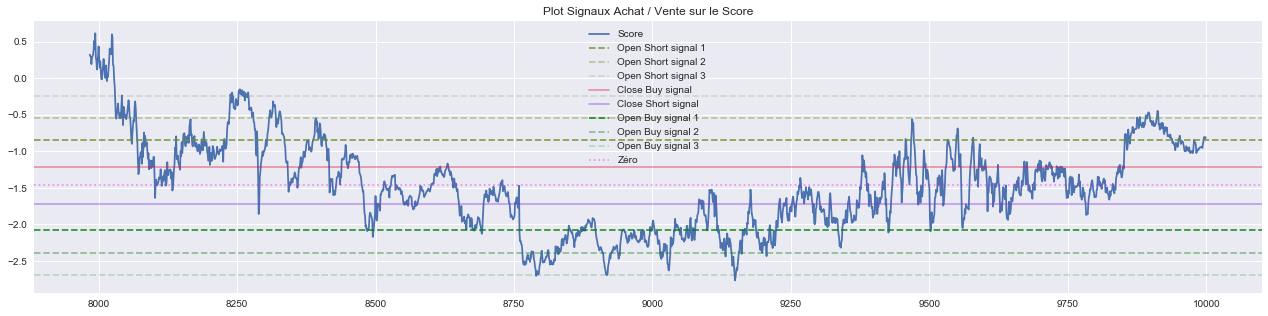

(Le timer est à :  51 )

EXECUTION DU PROTOCOLE STAT-ARB 




  ./\_-°oO-_____S H O O T_____-Oo°-_./\ 
Taille pour USD/MXN  :  53.4385
Taille pour USD/CAD  :  77.7189
Taille pour NZD/USD  :  39.1116
Taille pour AUD/USD  :  10.8734
Taille pour USD/ZAR  :  21.8681
Heure locale du trade : 2020-05-14 00:51:35


KeyError: 'USD/MXN'

In [6]:
#########################
####### OPERATIVE #######
#########################

os.system('say "ep grade dé daunai"')
balance = con.get_accounts().balance
equity = con.get_accounts().equity

print('Balance : ',balance[0])

print('Equity : ',equity[0])

if len(resum) == 0:
    print('\nPas de position actuellement en cours. Vous pouvez procéder à la suite\n')
    main_func()
else:
    if (len(resum)%5) != 0:
        print('\nAnomalie détectée. Fermeture de toutes les positions en cours\n')
        close_all()
        main_func()
    else:
        d = shelve.open('varlog') 
    for key,val in d.items():
        exec(key + '=val') 
    for key,val in D.items():
        exec(key + '=val')
    d.close()

try:
    dyn_net_pnl = con.get_summary().netPL.sum()
except:
    dyn_net_pnl = 0
if dyn_net_pnl >0:
    print('\r'+Fore.GREEN+'Dynamic NET PNL (',sens,'): ',round(dyn_net_pnl,2),'€\n'+Style.RESET_ALL,end='')            
elif dyn_net_pnl <0:
    print('\r'+Fore.RED+'Dynamic NET PNL (',sens,'): ',round(dyn_net_pnl,2),'€\n'+Style.RESET_ALL,end='')
print('Liste Combo',TICKERS)
print('Reprise de la boucle')
continuum(coef)


In [8]:
coef

array([ 0.08469499, -0.03022333,  0.0084024 ,  0.31290069])